# 퀀트 전략을 이용한 종목선정

투자에 필요한 주가, 재무제표, 가치지표 데이터가 준비되었다면 퀀트 전략을 이용해 투자할 종목을 선정해야 한다. 퀀트 투자는 크게 포트폴리오 운용 전략과 트레이딩 전략으로 나눌 수 있다. 포트폴리오 운용 전략은 과거 주식 시장을 분석해 좋은 주식의 기준을 찾아낸 후 해당 기준에 만족하는 종목을 매수하거나, 이와 반대에 있는 나쁜 주식을 공매도하기도 한다. 투자의 속도가 느리며, 다수의 종목을 하나의 포트폴리오로 구성해 운용하는 특징이 있다. 반면 트레이딩 전략은 주식이 오르거나 내리는 움직임을 연구한 후 각종 지표를 이용해 매수 혹은 매도하는 전략이다. 투자의 속도가 빠르며 소수의 종목을 대상으로 한다. 이번 장에서는 퀀트 전략을 이용한 종목선정에 대해 알아보며, 트레이딩 전략에 대해서는 이후 장에서 살펴볼 것이다.

```{table} 퀀트 투자 종류의 비교
:name: quant_type

| 기준 | 포트폴리오 운용 전략 | 트레이딩 전략 | 
| --- | --- | --- |
| 투자철학	| 규칙에 기반한 투자 | 규칙에 기반한 투자 |
| 투자목적 | 좋은 주식을 매수 | 좋은 시점을 매수 |
| 학문적 기반 |	경제학, 통계학 등	| 통계학, 공학, 정보처리 등 |
| 투자의 속도	| 느림 | 빠름 |
```

```{note}
SQL에 데이터베이스를 구축하지 않은 상태에서 이번 장을 실습하고자 할 경우 깃허브에 업로드 된 피클 파일을 다운로드 받으면 된다. 먼저 아래 사이트에 접속하여 각 파일을 클릭한 후 [Download] 버튼을 눌러 파일을 다운받는다.

https://github.com/hyunyulhenry/quant_py/tree/main/data

파이썬에서 `pd.read_pickle("파일주소/파일명.pkl")`을 실행하면 피클 파일을 불러올 수 있다.
```


## 팩터 이해하기

하나 혹은 소수의 주식만을 연구해서 주식이 오르거나 내리는 공통적인 이유를 찾는 것은 불가능에 가깝지만, 그룹으로 살펴보면 어느 정도 파악이 가능하다. 어떠한 특성, 예를 들어 기업의 크기 별로 주식들을 묶은 후 수익률을 살펴보면, 크기가 큰 기업의 수익률이 좋았는지 아니면 작은 기업의 수익률이 좋았는지 알 수 있다. 즉, 오르는 주식과 내리는 주식은 애초에 가지고 있는 특성이 다르며 그로 인해 수익률에도 차이가 있다. 이처럼 주식의 수익률에 영향을 미치는 특성들을 '팩터(Factor)'라고 하며, 주식의 수익률은 이러한 팩터들로 대부분 설명된다. 주식이 가지고 있는 특성만 제대로 알아도 오를만한 주식을 선별하거나, 혹은 내릴만한 주식을 걸러낼 수 있다.

그러나 단순히 특성을 기준으로 수익률이 높거나 낮다고 해서 팩터로 인정되는 것은 아니다. 팩터로 인정되고 전략으로 사용되기 위해서는 아래의 조건을 충족해야 한다.

- 지속성: 오랜 기간, 그리고 여러 경제 상황에서도 꾸준히 작동해야 한다. 몇 달 혹은 몇 년 동안의 기간에서만 작동한다면 우연의 결과일 가능성이 매우 크다.
- 범용성: 특정 국가에서만 작동하는 것이 아닌 다양한 국가, 지역, 섹터, 자산군에서도 작동해야 한다. 전세계 중 한국에서만 작동하는 전략이라면 이 역시 우연일 가능성이 크다.
- 이해 가능성: 전략이 작동하는 이유 및 지속 가능한지에 대한 설명이 가능해야 한다. 수익률이 높은 이유를 경제학이나 이론적으로 설명할 수 있어야 앞으로도 수익률이 높을 것이라 믿을 수 있다. 이유가 없는 효과는 우연 혹은 과최적화의 결과일 가능성이 매우 높다.
- 강건성: 같은 팩터라면 비슷한 정의(예: 가치주를 정의하는 PBR, PER, PSR 등) 모두에서 작동해야 한다. 전략이 작동하는 이유가 명확하다면 정의가 약간씩 달라도 당연히 작동해야 하며, 결과 역시 비슷해야 한다.
- 투자 가능성: 이론적으로만 작동하는 것이 아닌 실제로 투자가 가능해야 한다. 아무리 좋은 전략도 수수료, 세금, 법률적인 문제 등으로 실제 투자가 불가능하다면 돈을 벌 수 없기 때문이다.

퀀트 운용 전략에서는 팩터의 강도가 양인 종목들로 구성한 포트폴리오는 향후 수익률이 높을 것으로 예상되어 매수를 하며, 팩터의 강도가 음인 종목들로 구성한 포트폴리오는 반대로 향후 수익률이 낮을 것으로 예상되어 매수를 하지 않거나 공매도를 한다. 이번 장에서는 투자에 많이 활용되는 기본적인 팩터들에 대해 알아보고, 우리가 구한 데이터를 바탕으로 각 팩터별 투자 종목을 선택하는 방법을 알아보겠다.

## 베타 이해하기

투자자들이라면 누구나 한 번은 베타(Beta)라는 용어를 들어봤을 것이다. 기본적으로 전체 주식시장의 움직임은 개별 주식의 수익률에 가장 크게 영향을 주는 팩터일 수밖에 없다. 아무리 좋은 주식도 주식시장이 폭락한다면 같이 떨어지며, 아무리 나쁜 주식도 주식시장이 상승한다면 대부분 같이 오르기 마련이다.

개별 주식이 전체 주식시장의 변동에 반응하는 정도를 나타낸 값이 베타다. 베타가 1이라는 뜻은 주식시장과 움직임이 정확히 같다는 뜻으로서 시장 그 자체를 나타낸다. 베타가 1.5라는 뜻은 주식시장이 수익률이 +1%일 때 개별 주식의 수익률은 +1.5% 움직이며, 반대로 주식시장의 수익률이 -1%일 때 개별 주식의 수익률은 -1.5% 움직인다는 뜻이다. 반면 베타가 0.5라면 주식시장 수익률의 절반 정도만 움직인다.

```{table} 베타에 따른 개별 주식의 수익률 움직임
:name: beta

| 베타 | 주식시장이 +1% 일 경우 | 주식시장이 -1% 일 경우 | 
| --- | --- | --- |
| 0.5 | +0.5% | -0.5% |
| 1.0 | +1.0% | -1.0% |
| 1.5 | +1.5% | -1.5% |
```

이처럼 베타가 큰 주식은 주식시장보다 수익률의 움직임이 크며, 반대로 베타가 낮은 주식은 주식시장보다 수익률의 움직임이 작다. 따라서 일반적으로 상승장이 기대될 때는 베타가 큰 주식에, 하락장이 기대될 때는 베타가 낮은 주식에 투자하는 것이 좋다.

주식시장에서 베타는 통계학의 회귀분석모형에서 기울기를 나타내는 베타와 의미가 같다. 회귀분석모형은 $y = a + bx$ 형태로 나타나며, 회귀계수인 $b$는 $x$의 변화에 따른 $y$의 변화의 기울기다. 이를 주식에 적용한 모형이 자산가격결정모형(CAPM: Capital Asset Pricing Model)이며, 그 식은 다음과 같다.

$$회귀분석모형:\ y = a + bx$$
$$자산가격결정모형: R_i = R_f + \beta_i \times [R_m - R_f]$$

먼저 회귀분석모형의 상수항인 $a$에 해당하는 부분은 무위험 수익률을 나타내는 $R_f$다. 독립변수인 $x$에 해당하는 부분은 무위험 수익률 대비 주식 시장의 초과 수익률을 나타내는 시장위험 프리미엄인 $R_m - R_f$이다. 종속변수인 $y$에 해당하는 부분은 개별주식의 수익률을 나타내는 $R_i$이며, 최종적으로 회귀계수인 $b$에 해당하는 부분은 개별 주식의 베타다.

```{table} 회귀분석모형과 자산가격결정모형의 비교
:name: beta_formulta
| 구분 | 회귀분석모형 | 자산가격결정모형 | 
| --- | --- | --- |
| 상수항 | $a$ | $R_f$ (무위험수익률) |
| 독립변수 | $x$ | $R_m - R_f$ (시장위험 프리미엄) |
| 종속변수 | $y$ | $R_i$ (개별주식의 수익률) |
| 회귀계수 | $b$ | $\beta_i$ (개별주식의 베타) |
```

통계학에서 회귀계수는 $\beta = \frac{cov(x,y)}{\sigma_x^2}$ 형태로 구할 수 있으며, $x$와 $y$에 각각 시장수익률과 개별주식의 수익률을 대입할 경우 개별주식의 베타는 $\beta_i= \rho(i,m) \times\frac{\sigma_i}{\sigma_m}$ 형태로 구할 수 있다. 그러나 이러한 수식을 모르더라도 파이썬에서는 함수를 이용해 간단히 베타를 구할 수 있다.

### 베타 계산하기

베타를 구하는 방법을 알아보기 위해 주식시장에 대한 대용치로 KOSPI 지수를, 개별주식으로는 전통적 고베타주인 증권주를 이용한다.

In [1]:
import yfinance as yf
import pandas as pd

#tickers = ['^KS11', '039490.KS'] 
tickers = ['^KS11', '022100.KS'] 

all_data = {}
for ticker in tickers:
    all_data[ticker] = yf.download(ticker,
                                   start="2016-01-01",
                                   end='2024-06-21') 
    
prices = pd.DataFrame({tic: data['Close'] for tic, data in all_data.items()})
ret = prices.pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1. KOSPI 코드(^KS11)와  증권주인 키움증권의 티커(039490.KS)를 입력한다.
2. `DataReader()` 함수를 이용하여 해당 티커들의 2016년부터 2021년까지 데이터를 다운로드 받는다.
3. 종가(Close)에 해당하는 열만 선택한 후, 데이터프레임 형태로 만들어준다.
4. `pct_change()` 함수를 통해 수익률을 계산한 후, NA 데이터는 삭제한다.

In [2]:
import statsmodels.api as sm

ret['intercept'] = 1
reg = sm.OLS(ret[['022100.KS']], ret[['^KS11', 'intercept']]).fit()

증권주를 대상으로 베타를 구하기 위한 회귀분석을 실시한다. 자산가격결정모형의 수식인 $R_i = R_f + \beta_i \times [R_m - R_f]$에서 편의를 위해 무위험 수익률인 $R_f$를 0으로 가정하면, $R_i = \beta_i \times R_m$의 형태로 나타낼 수 있다. 이 중 $R_m$는 독립변수인 주식시장의 수익률을 의미하고, $R_i$는 종속변수인 개별 주식의 수익률을 의미한다.

1. 먼저 알파를 계산하기 위헤 intercept(절편)에 해당하는 열에 1을 입력한다.
2. 종속변수에는 증권주, 독립변수에는 KOSPI 지수 수익률 및 절편을 입력한다.
3. statsmodels 패키지의 `OLS()` 함수를 통해 손쉽게 선형회귀분석을 실시할 수 있으며, 회귀분석의 결과를 reg 변수에 저장한다.

In [3]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              022100.KS   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     509.2
Date:                Sat, 06 Jul 2024   Prob (F-statistic):          5.12e-101
Time:                        19:48:00   Log-Likelihood:                 4481.0
No. Observations:                2076   AIC:                            -8958.
Df Residuals:                    2074   BIC:                            -8947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
^KS11          1.3091      0.058     22.567      0.000       1.195       1.423
intercept      0.0011      0.001      1.865      0.062   -5.93e-05       0.002
==============================================================================
Omnibus:                     1378.511   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54692.123
Skew:                           2.572   Prob(JB):                         0.00
Kurtosis:                      27.613   Cond. No.                         94.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
print(reg.params)

^KS11        1.309105
intercept    0.001145
dtype: float64


`summary()` 메서드는 회귀분석 결과의 요약 정보를 보여준다. 또한 `reg.params` 을 통해 베타(^KS11) 및 알파(intercept)에 해당하는 값만 선택할 수도 있다.

회귀분석의 결과 테이블 중 베타를 나타내는 부분은 coef 이다. 베타값이 약 1.43으로 높아 증권주의 특성인 고베타주임이 확인되며, t값 또한 약 29로써 유의성을 가르는 2 보다 크므로 결과가 유의하다고 볼 수 있다. 반면 알파(intercept)는 0.0002 수준이며 t값 역시 0.376으로 매우 낮아, 증권주의 수익률은 주식 시장에 대한 노출도인 베타를 제외하고 나면 초과 수익이 없다고 볼 수 있다.

## 밸류 전략

가치주 효과란 내재 가치 대비 낮은 가격의 주식(저PER, 저PBR 등)이, 내재 가치 대비 비싼 주식(고PER, 고PBR)보다 수익률이 높은 현상을 뜻한다. 가치주 효과가 발생하는 원인은 바로 사람들이 가치주(저밸류에이션)를 기피하고, 성장주(고밸류에이션)를 선호하기 때문이다. 달리 말하면 사람들이 기피한 주식이 가치주가 되었다고 할 수도 있다. 가치주는 일반적으로 차입비율이 높고, 수익의 변동성이 크며, 경기가 좋지 않을 때 더 위험한 경향이 있다. 사람들은 이처럼 위험한 주식에 필요 이상으로 과민 반응을 보인다. 그로 인해 주가가 하락하고 가치주가 되는 것이다. 반면 인간은 익숙한 것을 안전하다고 착각하는 경향이 있다. 최근 성과가 좋은 주식은 여러 매체를 통해 접하기 쉬운데, 이런 주식을 안전하다고 착각해 많은 사람이 매수에 나선다. 그로 인해 주가가 상승하고 고평가주가 된다. 보고 싶은 것만 보는 확증 편향으로 인해 투자자들은 위험하다고 생각되는 가치주가 망할 것 같은 이유만 찾아 더욱 기피하고, 안전하다고 생각되는 성장주는 영원히 상승할 것 같은 이유만 찾아 더욱 선호한다. 그러나 가치주가 생각보다 위험하지 않다는 것을, 성장주가 너무 많이 상승해 안전하지 않다는 것을 깨닫는 순간 주가는 원래 수준으로 회귀하기 마련이고, 이로 인해 가치주 효과가 발생한다.

### `DataReader()` 함수를 이용한 팩터 데이터 다운로드

주식시장 내에서 실제로 가치주 효과가 있는지 데이터로 확인해볼 필요가 있다. 파마-프렌치 3팩터로 유명한 케네스 프렌치 교수의 Data Library에는 각종 팩터에 관한 수익률이 매월 업데이트 되고 있다.

```
https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
```

또한 `DataReader()` 함수를 이용하면 해당 사이트의 데이터를 불러올 수 있어, 팩터 데이터를 매우 쉽게 분석할 수 있다. 먼저 어떠한 팩터 데이터가 있는지 확인해보도록 하자.

In [5]:
import pandas_datareader.data as web
from pandas_datareader.famafrench import get_available_datasets

datasets = get_available_datasets()
datasets[1:20]

['F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly']

이 중 원하는 데이터의 이름을 찾는법은 다음과 같다. 먼저 홈페이지에서 원하는 팩터를 검색한 후, [CSV] 글자에서 마우스를 우클릭 해 [링크 주소 복사]를 누른다.

```{figure} image/factor/link.png
---
name: link
---
프렌치 라이브러리에서 주소 확인하기
```

PBR에 따른 수익률에 해당하는 'Portfolios Formed on Book-to-Market'의 다운로드 링크를 메모장 등에서 확인해보면 다음과 같다.

```
https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Portfolios_Formed_on_BE-ME_CSV.zip
```

이 중 끝부분의 'Portfolios_Formed_on_BE-ME_CSV' 에서 '\_CSV' 를 제외한 글자인 'Portfolios_Formed_on_BE-ME'를 `DataReader()` 함수 내에 입력하면 해당 데이터가 다운로드 된다.

### PBR별 포트폴리오의 수익률

먼저 기업의 가치 여부를 판단할 때 가장 많이 사용되는 지표인 PBR을 기준으로 구성된 포트폴리오의 수익률을 비교해보겠다. 프렌치 라이브러리에서 해당 데이터의 이름은 'Portfolios_Formed_on_BE-ME' 이다. B/M에서 B는 장부가치(Book Value), M는 시장가치(Market Value)로써, 이는 PBR의 역수라고 생각해도 된다. 즉 해당값이 높을수록 저PBR 주식을 의미한다.

In [7]:
import pandas_datareader.data as web
import pandas as pd

df_pbr = web.DataReader('Portfolios_Formed_on_BE-ME',
                        'famafrench',
                        start='1900-01-01')
df_pbr[0].tail()

/tmp/ipykernel_164246/4186393022.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_pbr = web.DataReader('Portfolios_Formed_on_BE-ME',
/tmp/ipykernel_164246/4186393022.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_pbr = web.DataReader('Portfolios_Formed_on_BE-ME',
/tmp/ipykernel_164246/4186393022.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_pbr = web.DataReader('Portfolios_Formed_on_BE-ME',
/tmp/ipykernel_164246/4186393022.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in 

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,,,,,,,,,,
2024-01,0.19,1.64,1.50,-2.62,1.96,-0.74,2.37,0.46,-2.08,2.29,1.28,-0.23,-1.76,2.50,2.17,2.05,-3.77,-2.73,-0.04
2024-02,3.61,5.59,6.31,2.71,6.10,3.09,7.48,4.55,2.64,5.92,6.46,2.52,4.25,10.19,3.35,5.16,2.86,2.98,1.62
2024-03,3.36,2.33,4.61,7.24,1.75,5.70,3.74,6.08,8.01,1.22,2.81,5.98,5.15,3.33,4.42,6.24,5.62,7.98,8.09
2024-04,-7.11,-3.36,-5.02,-5.98,-4.13,-0.91,-4.79,-5.52,-5.94,-4.08,-4.24,1.27,-5.31,-4.19,-5.76,-5.34,-6.07,-6.08,-5.52
2024-05,2.35,5.62,3.30,4.33,5.79,3.77,3.27,4.42,4.24,7.64,2.07,4.64,1.90,3.64,2.67,4.39,4.51,4.58,3.18


딕셔너리 형태에 여러개의 테이블이 존재하며, 이 중 키값이 0인 데이터가 PBR을 기준으로 종목을 나눈 후 시가총액가중방식으로 포트폴리오를 구성하였을 때의 월간 수익률을 의미한다. 각 열에 대한 설명은 다음과 같다.

- <=0: PBR이 0 이하인 기업들의 포트폴리오
- Lo 30, Med 40, Hi 30: PBR 기준 상위 30%, 30-70%, 하위 30%로 나눈 포트폴리오
- Lo 20, Qnt 2, Qnt 3, Qnt 4, Hi 20: PBR 기준 상위 20%, 20-40%, 40-60%, 60-80%, 80-100%로 나눈 포트폴리오
- Lo 10, Dec 2, Dec 3, ..., Dec 9, Hi 19: PBR 기준 상위 10% 씩으로 나눈 포트폴리오

이 중 20%씩 나눈 [Lo 20, Qnt 2, Qnt 3, Qnt 4, Hi 20] 열만 선택하여 누적 수익률을 확인해보자.

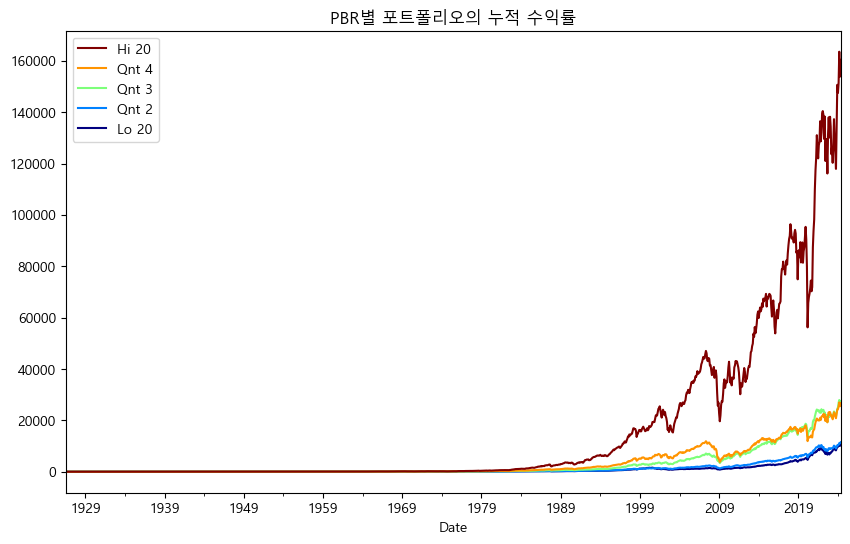

In [8]:
import matplotlib.pyplot as plt
from matplotlib import cm

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

df_pbr_vw = df_pbr[0].loc[:, ['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
df_pbr_cum = (1 + df_pbr_vw / 100).cumprod()
df_pbr_cum.plot(figsize=(10, 6),
                colormap=cm.jet,
                legend='reverse',
                title='PBR별 포트폴리오의 누적 수익률')
plt.show()

1. 폰트 설정 및 유니코드 마이너스 기호를 쓰지 않도록 설정해준다.
2. 원하는 열만 선택한다.
3. 해당 사이트의 데이터는 1이 1%를 의미하므로, 올바른 계산을 위해 100으로 나누어준 후 `cumprod()` 메서드를 통해 누적 수익률을 계산한다.

누적 수익률을 확인해보면, B/M 값이 높을 수록, 즉 PBR이 낮을 수록(Hi 20) 수익률이 높은 가치주 효과가 확인된다. 그러나 Hi 20과 다른 포트폴리오간의 수익률 차이가 너무 커 제대로된 비교가 되지 않는다. 이처럼 $y$축을 단순 수익률로 볼 경우 장기적인 성장률을 왜곡시키므로, 로그 수익률로 나타내는 것이 일반적이다. 단순 수익률($r$)과 로그 수익률($R$) 간의 관계는 다음과 같다.

$$(1+r) = e^R$$
$$ln(1+r) = R$$

즉 단순 수익률에 1을 더한 후 로그를 취하면 로그 수익률을 구할 수 있다. 또한 단순 수익률은 누적 수익률을 계산할 때 $(1+r_1)\times(1+r_2)\times\dots\times(1+r_n)$ 처럼 곱을 해 나가지만 로그 수익률은 $R_1+R_2+\dots+R_n$ 처럼 더하면 된다. 이는 아래의 관계 때문이다.

$$(1+r_1)(1+r_2) = e^{R_1}e^{R_2} = e^{R_1+R_2}$$
$$ln(1+r_1)(1+r_2) = R_1+R_2$$

위의 관계를 이용해 로그 차트로 다시 나타내보자.

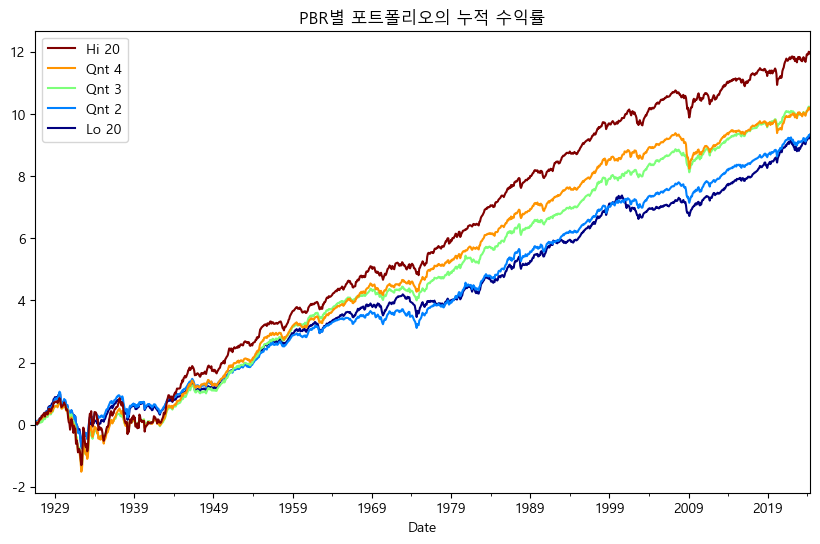

In [9]:
import numpy as np

df_pbr_cum = np.log(1+df_pbr_vw/100).cumsum()
df_pbr_cum.plot(figsize=(10, 6),
                colormap=cm.jet,
                legend='reverse',
                title='PBR별 포트폴리오의 누적 수익률')
plt.show()

`log()` 함수를 이용해 로그 수익률을 계산해준 후 `cumsum()` 메서드를 통해 누적합을 구했다. 로그 수익률로 살펴보면 앞의 그래프보다 장기적인 성장률이 훨씬 더 잘 비교가 된다. 이번에는 PBR별 포트폴리오의 간단한 성과를 비교해보도록 하자. 연율화 수익률(기하), 연율화 수익률(산술), 연율화 변동성 및 샤프지수를 구하는 함수를 만들면 다음과 같다.

In [9]:
import pandas as pd

def factor_stat(df):

    n = len(df)

    ret_ari = (df / 100).mean(axis=0) * 12
    ret_geo = (1 + df / 100).prod()**(12 / n) - 1
    vol = (df / 100).std(axis=0) * np.sqrt(12)
    sharp = ret_ari / vol

    stat = pd.DataFrame(
        [ret_ari, ret_geo, vol, sharp],
        index=['연율화 수익률(산술)', '연율화 수익률(기하)', '연율화 변동성', '샤프지수']).round(4)

    stat.iloc[0:3, ] = stat.iloc[0:3, ] * 100

    return stat

1. `len()` 함수를 통해 행 갯수를 구한다.
2. 각 열의 연간 산술평균(ret_ari)을 구한다.
3. 각 열의 연간 기하평균(ret_geo)를 구한다.
4. 각 열의 변동성(vol)을 구한다.
5. 기하평균에서 변동성을 나누어 샤프지수를 구한다.
6. 하나의 데이터프레임으로 묶은 후 반올림을 한다.
7. 산술 수익률, 기하 수익률, 변동성 항목은 100을 곱해 퍼센트 형태로 나타낸다.

해당 함수를 PBR별 포트폴리오에 적용해보자.

In [10]:
factor_stat(df_pbr_vw)

,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20
연율화 수익률(산술),11.240,11.2600,12.3100,12.810,15.880
연율화 수익률(기하),9.880,9.9800,10.9800,10.930,12.980
연율화 변동성,18.830,18.5600,19.4800,22.320,27.720
샤프지수,0.597,0.6069,0.6323,0.574,0.573


Hi 20 즉 PBR이 가장 낮은 종목들로 구성된 포트폴리오의 수익률이 가장 높으며, 반대로 Low 20 즉 PBR이 가장 높은 종목들로 구성된 포트폴리오의 수익률은 가장 낮다.

프렌치 라이브러리에는 B/M(PBR) 외에도 E/P(PER), CF/P(PCR) 데이터도 존재하므로, 해당 지표 역시 누적 수익률을 확인해보도록 하자. 먼저 PER의 역수에 해당하는 E/P 지표의 누적 수익률은 다음과 같다.

/tmp/ipykernel_43943/903409442.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_per = web.DataReader('Portfolios_Formed_on_E-P',
/tmp/ipykernel_43943/903409442.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_per = web.DataReader('Portfolios_Formed_on_E-P',
/tmp/ipykernel_43943/903409442.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_per = web.DataReader('Portfolios_Formed_on_E-P',
/tmp/ipykernel_43943/903409442.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future versi

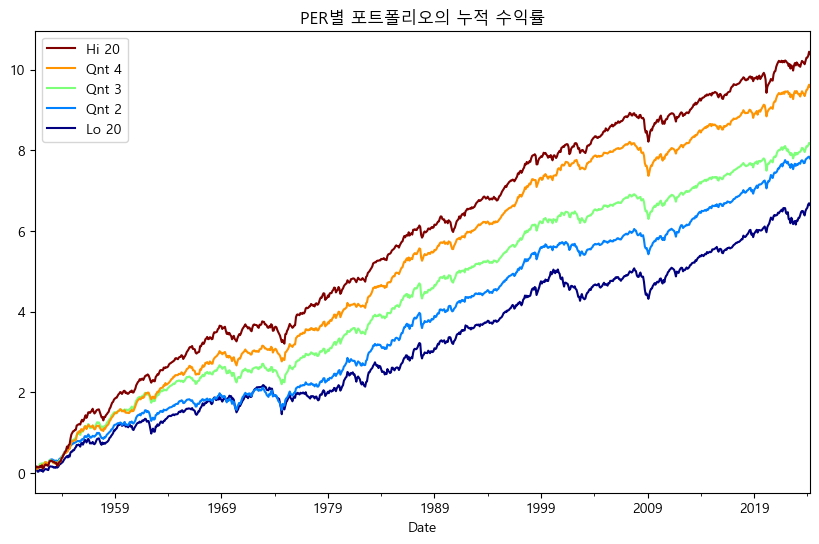

In [11]:
df_per = web.DataReader('Portfolios_Formed_on_E-P',
                        'famafrench',
                        start='1900-01-01')
df_per_vw = df_per[0].loc[:, ['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
df_per_cum = np.log(1 + df_per_vw / 100).cumsum()
df_per_cum.plot(figsize=(10, 6),
                colormap=cm.jet,
                legend='reverse',
                title='PER별 포트폴리오의 누적 수익률')
plt.show()

Hi 20, 즉 PER가 낮을 수록 수익률이 높다. 이번에는 PCR의 역수에 해당하는 CF/P 지표의 누적 수익률을 살펴보도록 하자.

/tmp/ipykernel_43943/1137851293.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_pcr = web.DataReader('Portfolios_Formed_on_CF-P',
/tmp/ipykernel_43943/1137851293.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_pcr = web.DataReader('Portfolios_Formed_on_CF-P',
/tmp/ipykernel_43943/1137851293.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_pcr = web.DataReader('Portfolios_Formed_on_CF-P',
/tmp/ipykernel_43943/1137851293.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a futur

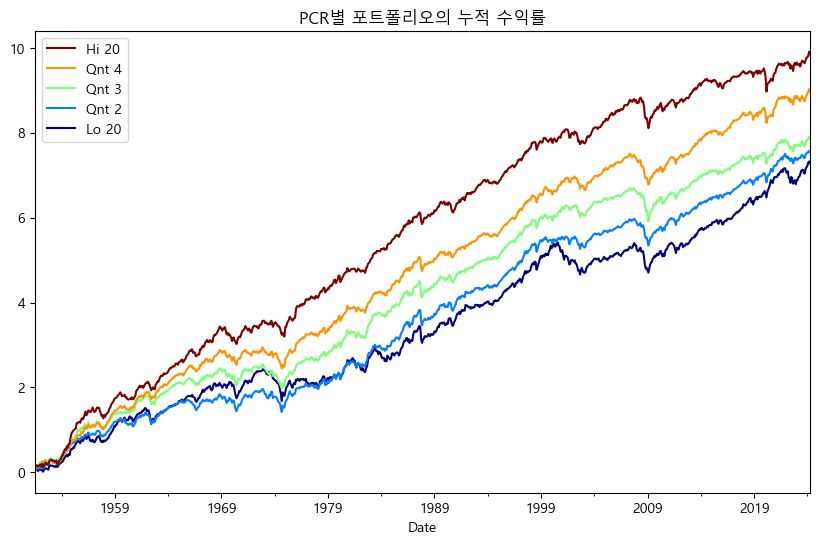

In [12]:
df_pcr = web.DataReader('Portfolios_Formed_on_CF-P',
                        'famafrench',
                        start='1900-01-01')
df_pcr_vw = df_pcr[0].loc[:, ['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
df_pcr_cum = np.log(1 + df_pcr_vw / 100).cumsum()
df_pcr_cum.plot(figsize=(10, 6),
                colormap=cm.jet,
                legend='reverse',
                title='PCR별 포트폴리오의 누적 수익률')
plt.show()

역시나 Hi 20, 즉 PCR이 낮을 수록 수익률이 높다. 즉, PBR 뿐만 아니라 PER, PCR과 같은 모든 지표에서 가치주 효과가 나타난다.

### 밸류 포트폴리오 구하기

가치주에 투자하는 것이 훨씬 수익률이 높다는 점을 확인하였으니, 국내 종목들 중 가치주에는 어떠한 것이 있는 확인해보도록 하자. 먼저 국내 기업 중 전통적인 가치지표인 PER와 PBR이 낮은 종목을 선정해보도록 하겠다.

In [14]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

engine = create_engine('mysql+pymysql://root:@127.0.0.1:3306/stock_db')

ticker_list = pd.read_sql("""
select * from kor_ticker
where 기준일 = (select max(기준일) from kor_ticker) 
	and 종목구분 = '보통주';
""", con=engine)

value_list = pd.read_sql("""
select * from kor_value
where 기준일 = (select max(기준일) from kor_value);
""", con=engine)

engine.dispose()

/tmp/ipykernel_43943/787585650.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ticker_list = pd.read_sql("""


AttributeError: 'Engine' object has no attribute 'cursor'

먼저 DB에서 티커 테이블과 가치지표 테이블을 불러온다.

In [15]:
value_list.loc[value_list['값'] <= 0, '값'] = np.nan
value_pivot = value_list.pivot(index='종목코드', columns='지표', values='값')
data_bind = ticker_list[['종목코드', '종목명']].merge(value_pivot,
                                               how='left',
                                               on='종목코드')

data_bind.head()

NameError: name 'value_list' is not defined

1. 일부 종목은 가치지표가 0보다 작은 경우(예: 적자기업의 경우 PER가 음수, 혹은 배당수익률이 0%인 종목)가 있으며 이러한 데이터는 nan으로 변경한다.
2. `pivot()` 함수를 통해 가치지표 테이블을 가로로 긴 형태로 변경한다.
3. `merge()` 함수를 통해티커 테이블과 가치지표 테이블을 합친다.

이제 PER와 PBR이 낮은 종목을 찾아보도록 한다.

In [22]:
value_rank = data_bind[['PER', 'PBR']].rank(axis = 0)
value_sum = value_rank.sum(axis = 1, skipna = False).rank()
data_bind.loc[value_sum <= 20, ['종목코드', '종목명', 'PER', 'PBR']]

,종목코드,종목명,PER,PBR
40,000880,한화,0.9289,0.1190
65,001390,KG케미칼,0.5887,0.2225
95,002020,코오롱,1.5480,0.2331
96,002030,아세아,1.8693,0.1702
152,003240,태광산업,2.2776,0.1956
157,003380,하림지주,1.7874,0.2069
220,004960,한신공영,2.2303,0.1286
269,006120,SK디스커버리,1.1551,0.1344
271,006200,한국전자홀딩스,1.6194,0.1499
321,007860,서연,1.9831,0.1953


1. `rank()` 함수를 통해 PER와 PBR 열의 순위를 구하며, `axis = 0`을 입력하여 순위는 열 방향으로 구한다. 즉 PER 내에서의 순위, PBR 내에서의 순위를 구한다.
2. `sum()` 함수 내에 `axis = 1`를 통해 위에서 구한 순위를 행 방향으로 값을 더하며, `skipna = False`를 통해 NA가 있는 종목은 제외한다. 그 후 다시 `rank()` 함수를 통해 순위의 합 기준으로 다시 순위를 구한다.
3. `value_sum <= 20` 즉 순위가 낮은 20 종목을 선택한다. 이는 PER과 PBR가 낮은 종목이라고 볼 수 있다. 

전통적으로 PER와 PBR이 낮은 지주회사가 많이 분포되어 있다.

### 여러 지표 결합하기

이번에는 가치지표에 해당하는 모든 지표, 즉  PER, PBR, PCR, PSR, DY를 고려한 밸류 포트폴리오를 만들어보도록 하겠다. 먼저 각 지표 별 상관관계를 살펴보도록 하자.

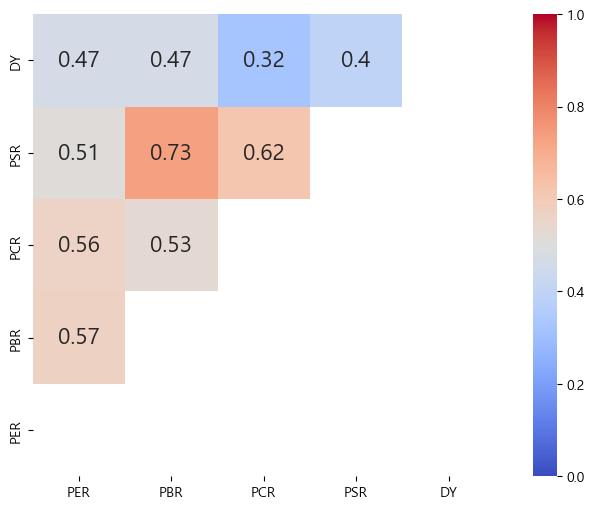

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

value_list_copy = data_bind.copy()
value_list_copy['DY'] = 1 / value_list_copy['DY']
value_list_copy = value_list_copy[['PER', 'PBR', 'PCR', 'PSR', "DY"]]
value_rank_all = value_list_copy.rank(axis=0)
mask = np.triu(value_rank_all.corr())

mask = np.triu(value_rank_all.corr())
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(value_rank_all.corr(),
            annot=True,
            mask=mask,
            annot_kws={"size": 16},
            vmin=0,
            vmax=1,
            center=0.5,
            cmap='coolwarm',
            square=True)
ax.invert_yaxis()
plt.show()

1. PER, PBR, PCR, PSR의 경우 값이 낮을수록 가치주에 해당하지만, DY의 경우 값이 높을수록 배당수익률이 높은 가치주에 해당한다. 따라서 DY에 역수를 취해 순서를 맞춰준다.
2. 각 지표의 순위를 열 방향으로 구한다.
3. `heatmap()` 함수를 통해 지표 별 상관관계를 히트맵으로 나타낸다.

비슷한 가치지표임에도 불구하고 서로 간의 상관관계가 꽤 낮은 지표도 있다. 따라서 지표를 통합적으로 고려하면 분산효과를 기대할 수도 있다.

In [24]:
value_sum_all = value_rank_all.sum(axis=1, skipna=False).rank()
data_bind.loc[value_sum_all <= 20]

,종목코드,종목명,DY,PBR,PCR,PER,PSR
17,000320,노루홀딩스,0.0502,0.2169,2.7435,3.9675,0.1277
40,000880,한화,0.0270,0.1190,1.1125,0.9289,0.0335
48,001040,CJ,0.0274,0.1513,0.6593,3.8829,0.0652
52,001120,LX인터내셔널,0.0993,0.4066,0.9572,1.5022,0.0624
57,001230,동국제강,0.0415,0.3560,1.6583,2.7004,0.1350
95,002020,코오롱,0.0269,0.2331,1.0804,1.5480,0.0456
96,002030,아세아,0.0266,0.1702,1.4708,1.8693,0.1475
269,006120,SK디스커버리,0.0525,0.1344,7.4858,1.1551,0.0708
324,008060,대덕,0.0624,0.1488,0.6749,1.6285,0.1307
373,009970,영원무역홀딩스,0.0464,0.2442,1.7255,0.9974,0.1976


1. 위에서 구한 다섯개 지표들의 순위를 더한 후 다시 순위를 매긴다.
2. 최종 순위가 낮은 20 종목을 선택한다. 즉 하나의 지표보다 다섯개 지표가 골고루 낮은 종목을 선택한다.

단순 저PER, 저PBR 포트폴리오와 달리 지주회사가 아닌 종목들도 포함되어 있다.

## 모멘텀 전략

투자에서 모멘텀이란 주가 혹은 이익의 추세로서, 상승 추세의 주식은 지속적으로 상승하며 하락 추세의 주식은 지속적으로 하락하는 현상을 말한다. 모멘텀의 종류는 크게 기업의 이익에 대한 추세를 나타내는 이익 모멘텀과 주가의 모멘텀에 대한 가격 모멘텀이 있으며, 이 중에서 3개월에서 12개월 가격 모멘텀을 흔히 모멘텀이라고 한다. 즉 과거 12개월 수익률이 높았던 종목이 계속해서 상승하는 현상을 모멘텀이라 한다.

```{note}
계산 기간에 따른 가격 모멘텀의 종류
- 단기 모멘텀: 최근 한 주 혹은 1개월 수익률이 높을(낮을)수록 차월 수익률이 낮은(높은) 현상. 단기 수익률 반전 현상이라고도 함.
- 중기 모멘텀: 최근 3~12개월 수익률이 높았던 주식이 향후에도 지속적으로 상승하는 현상.
- 장기 모멘텀: 최근 3~5년 수익률이 낮았던 종목들이, 수익률이 높았던 종목보다 성과가 높은 현상. 장기 수익률 반전 현상이라고도 함.
```

모멘텀 효과가 발생하는 이유는 기업의 가치 변화에 대한 사람들의 반응 때문이다. 기업의 이익이 증가하면 내재가치(펀더멘털 가치) 역시 증가하고, 이러한 가치는 {numref}`momentum`에서 실선으로 표시된 바와 같이 즉각적으로 변한다. 반면 점선으로 표시된 주식의 가격은 늘 새로운 정보에 반응해 상승하기는 하지만, 초기에는 이익에 대한 과소 반응으로 인해 상승폭이 낮으며 그 이후 계속해서 상승한다. 주식의 가격이 가치에 수렴하기 위해 상승하다 보면 투자자들의 주목을 끌기 마련이며, 양떼 효과로 인해 따라서 투자하는 이들이 많아진다. 그 결과, 과잉 반응이 발생해 주가는 계속해서 상승하며 모멘텀 효과가 발생한다. 그러나 투자자들이 기업의 가치에 비해 주가가 너무 비싸졌다고 판단하는 순간 주가는 하락하기 시작하며 반전이 이루어진다. 

```{figure} image/factor/momentum.png
---
name: momentum
---
내재가치 변화에 따른 시장가격의 반응

출처: Hurst, Ooi, and Pedersen (2013)
```

### 모멘텀별 포트폴리오의 수익률

최근 12개월 수익률을 기준으로 구성된 포트폴리오의 수익률을 비교해보겠다. 프렌치 라이브러이에서 해당 데이터의 이름은 '10_Portfolios_Prior_12_2' 이다.

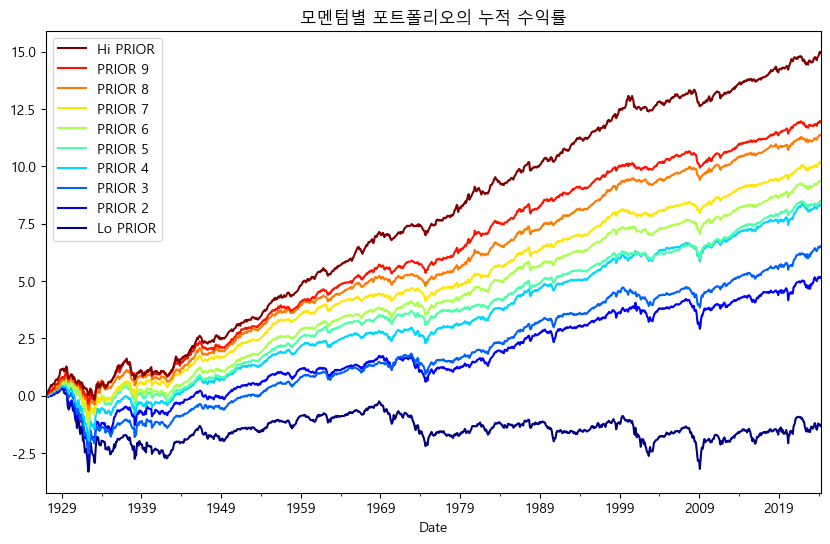

In [93]:
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

df_mom = web.DataReader('10_Portfolios_Prior_12_2',
                        'famafrench',
                        start='1900-01-01')
df_mom_vw = df_mom[0]
df_mom_cum = np.log(1 + df_mom_vw / 100).cumsum()

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

df_mom_cum.plot(figsize=(10, 6),
                colormap=cm.jet,
                legend='reverse',
                title='모멘텀별 포트폴리오의 누적 수익률')
plt.show()

모멘텀별 포트폴리오의 누적수익률을 확인해보면, 최근 12개월 수익률이 높을수록(Hi PRIOR) 향후에도 지속적으로 수익률이 높으며, 최근 12월 수익률이 낮을수록(Lo PRIOR) 향후에도 수익률이 낮은 '모멘텀 현상'이 존재한다. 이번에는 앞서 작성한 `factor_stat()` 함수를 이용해 포트폴리오별 통계값을 확인해보자.

In [19]:
factor_stat(df_mom_vw)

,Lo PRIOR,PRIOR 2,PRIOR 3,PRIOR 4,PRIOR 5,PRIOR 6,PRIOR 7,PRIOR 8,PRIOR 9,Hi PRIOR
연율화 수익률(산술),3.8100,8.7600,9.1000,10.8900,10.6900,11.460,12.1600,13.2900,14.1900,17.7300
연율화 수익률(기하),-1.6900,5.1200,6.4900,8.9200,9.0000,9.930,10.8700,12.2500,13.0200,16.3100
연율화 변동성,34.1600,28.0600,24.0600,21.9300,20.4900,19.970,18.9300,18.3400,19.3700,22.2900
샤프지수,0.1115,0.3121,0.3784,0.4966,0.5219,0.574,0.6423,0.7246,0.7327,0.7953


### 모멘텀 포트폴리오 구하기

최근 12개월 수익률이 높은 주식에 투자하는 것이 훨씬 수익률이 높다는 점을 확인하였으니, 국내 종목들 중 모멘텀 주식에는 어떠한 것이 있는 확인해보도록 하자.

In [94]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine('mysql+pymysql://root:@127.0.0.1:3306/stock_db')

ticker_list = pd.read_sql(
"""
select * from kor_ticker
where 기준일 = (select max(기준일) from kor_ticker) 
	and 종목구분 = '보통주';
""", con=engine)


price_list = pd.read_sql(
"""
select 날짜, 종가, 종목코드
from kor_price
where 날짜 >= (select (select max(날짜) from kor_price) - interval 1 year);
""", con=engine)

engine.dispose()

price_list.head()

,날짜,종가,종목코드
0,2022-05-04,12500.0,000020
1,2022-05-04,853.0,000040
2,2022-05-04,15650.0,000050
3,2022-05-04,44250.0,000060
4,2022-05-04,84900.0,000070


먼저 DB에서 티커 테이블과 가격 테이블을 불러온다. 가격의 경우 `where 날짜 >= (select (select max(날짜) from kor_price) - interval 1 year)` 부분을 통해 테이블에서 최근일 기준 1년전의 날짜를 구한 후, 해당일 이후인 최근 1년치 가격 정보만 불러온다.

In [95]:
price_pivot = price_list.pivot(index='날짜', columns='종목코드', values='종가')
price_pivot.iloc[0:5, 0:5]

종목코드,000020,000040,000050,000060,000070
날짜,,,,,
2022-05-04,12500.0,853.0,15650.0,44250.0,84900.0
2022-05-06,12200.0,843.0,15700.0,44500.0,85400.0
2022-05-09,11750.0,820.0,15550.0,42500.0,83100.0
2022-05-10,11700.0,812.0,15400.0,41100.0,81200.0
2022-05-11,11900.0,825.0,15450.0,36800.0,82000.0


`pivot()` 함수를 통해 가격 테이블을 가로로 긴 형태로 변경한다.

In [5]:
ret_list = pd.DataFrame(data=(price_pivot.iloc[-1] / price_pivot.iloc[0]) - 1,
                        columns=['return'])
data_bind = ticker_list[['종목코드', '종목명']].merge(ret_list, how='left', on='종목코드')

data_bind.head()

,종목코드,종목명,return
0,000020,동화약품,-0.312000
1,000040,KR모터스,-0.198124
2,000050,경방,-0.325240
3,000070,삼양홀딩스,-0.151943
4,000080,하이트진로,-0.393531


1. 가격 테이블(price_pivot)에서 가장 끝 행(`price_pivot.iloc[-1]`)을 가장 첫 행(`price_pivot.iloc[0]`)으로 나누어 각 종목의 12개월 수익률을 구한 후, 데이터프레임 형태로 만든다.
2. 티커 테이블에 해당 내역을 합친다.

이제 12개월 수익률이 높은 종목을 찾아보도록 하자.

In [6]:
momentum_rank = data_bind['return'].rank(axis=0, ascending=False)
data_bind[momentum_rank <= 20]

,종목코드,종목명,return
79,001570,금양,12.276231
238,005420,코스모화학,2.794966
288,006740,영풍제지,2.655959
362,009520,포스코엠텍,2.145833
407,011230,삼화전자,2.616188
599,024850,HLB이노베이션,3.008475
692,033100,제룡전기,2.156900
953,051980,중앙디앤엠,4.081633
1038,058970,엠로,2.258065
1297,086520,에코프로,6.769751


1. `rank()` 함수를 통해 12개월 수익률 열의 순위를 구하며, 모멘텀의 경우 지표가 높을수록 좋으므로 `ascending = False` 인자를 통해 내림차순으로 순위를 구한다.
2. 'momentum_rank <= 20' 즉 모멘텀이 높은 20 종목을 선택한다.

마지막으로 해당 종목들의 가격 그래프를 확인해보도록 하자.

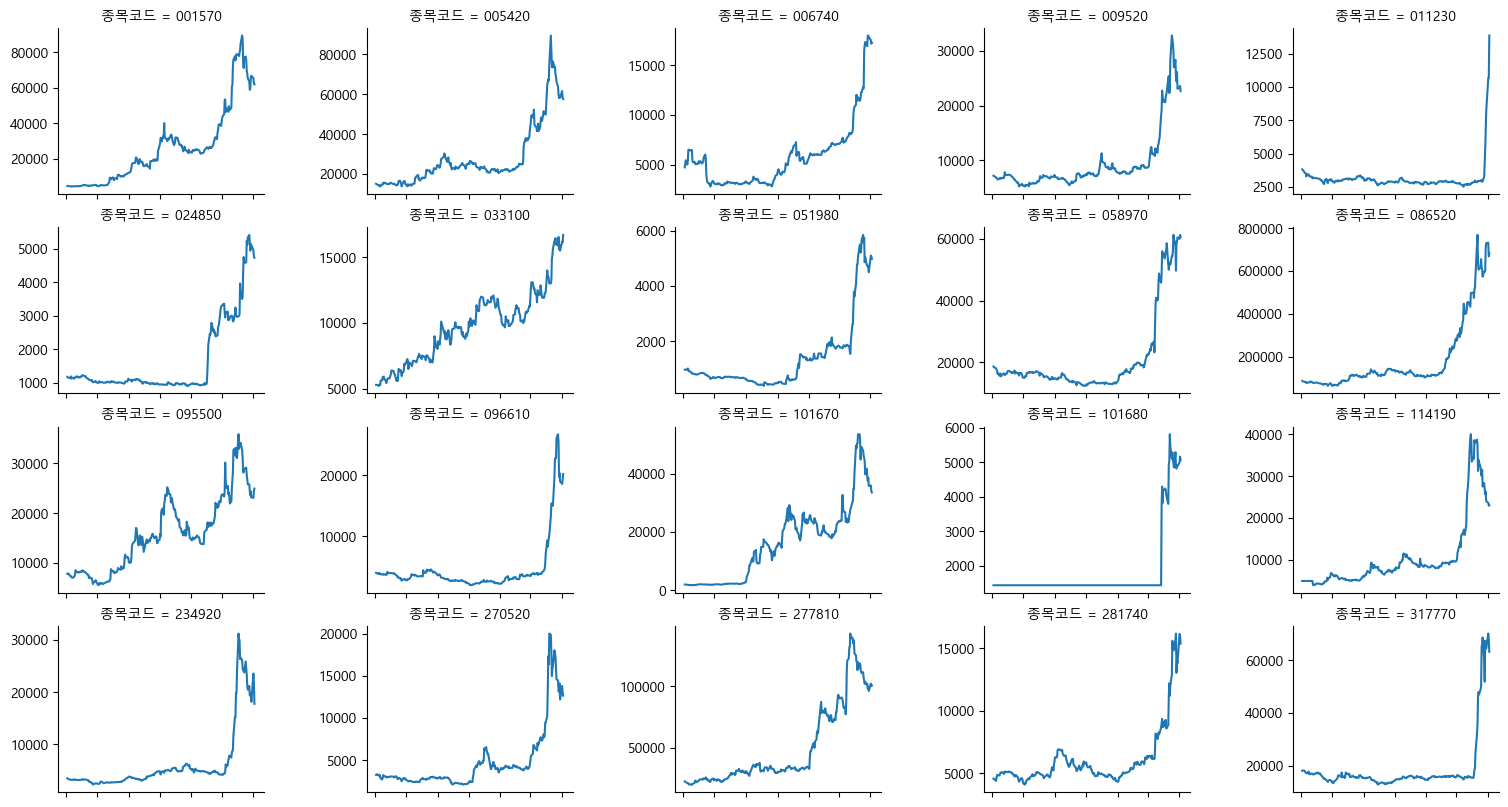

In [7]:
price_momentum = price_list[price_list['종목코드'].isin(
    data_bind.loc[momentum_rank <= 20, '종목코드'])]

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
g = sns.relplot(data=price_momentum,
                x='날짜',
                y='종가',
                col='종목코드',
                col_wrap=5,
                kind='line',
                facet_kws={
                    'sharey': False,
                    'sharex': True
                })
g.set(xticklabels=[])
g.set(xlabel=None)
g.set(ylabel=None)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)
plt.subplots_adjust(wspace=0.5, hspace=0.2)
plt.show()

### K-Ratio

12개월 수익률 기준 모멘텀 종목들의 주가 그래프를 보면 단순히 수익률 만으로 종목을 선택할 경우 다음과 같은 종목 또한 포함된다.

1. 장기간 수익률이 횡보하다가 최근 주가가 급등하여 누적수익률 역시 높게 나타나는 종목
2. 이미 몇달전에 주가가 급등한 후 최근에는 하락세이지만, 누적수익률 자체는 높게 나타나는 종목

반면 좋은 모멘텀 주식이란 단순히 많이 상승한 것이 아닌, 꾸준하게 상승하는 종목이다. 하나의 예를 살펴보자.

```{figure} image/factor/factor_k.png
---
name: factor_k
---
모멘텀의 종류
```

동일한 누적수익률을 가진 두 종목이 있다고 가정해보자. A의 경우 상승폭이 작다가 최근 급등하여 누적수익률이 높아진 경우다. 반면 B의 경우 꾸준하게 상승하여 누적수익률이 높아진 경우다. 이 중 꾸준하게 상승한 B가 더 뛰어난 모멘텀 주식이라고 볼 수 있다. 이처럼 꾸준한 상승을 측정하기 위해 실무에서는 단순 12개월 수익률이 아닌 3~12개월 수익률을 같이 보거나, 변동성을 함께 고려하기도 한다. 그 중 모멘텀의 꾸준함을 측정하는 지표 중 하나가 'K-Ratio'다. 해당 지표는 다음과 같다.

$$K-Ratio = \frac{누적수익률의\ 기울기}{표준\ 오차}$$

누적수익률이 높을수록 기울기도 커져 분자는 커진다. 또한 추세가 꾸준할수록 표준 오차가 작아 분모는 작아진다. 따라서 추세가 꾸준하게 많이 상승할수록 K-Ratio는 증가한다. 먼저 K-Ratio를 측정하는 법을 살펴보자.

In [8]:
import statsmodels.api as sm
import numpy as np

ret = price_pivot.pct_change().iloc[1:]
ret_cum = np.log(1 + ret).cumsum()

x = np.array(range(len(ret)))
y = ret_cum.iloc[:, 0].values

1. `pct_change()` 함수를 통해 각 종목의 수익률을 계산하며, 수익률이 계산되지 않는 첫번째 행은 제외한다.
2. 수익률에 1을 더한 후 로그를 취하고, 해당값의 누적합을 구한다. 결과적으로 로그 누적수익률을 계산한다.
3. $x$축에는 기간에 해당하는 값을, $y$축에는 첫번째 종목의 로그 누적수익률에 해당하는 값을 입력한다.

이제 해당 종목의 K-Ratio를 구해보도록 하자.

In [9]:
reg = sm.OLS(y, x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              2143.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):                   1.01e-123
Time:                        13:31:58   Log-Likelihood:                          237.73
No. Observations:                 248   AIC:                                     -473.5
Df Residuals:                     247   BIC:                                     -469.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0019   4.14e-05    -46.288      0.000      -0.002      -0.002
==============================================================================
Omnibus:                       15.779   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.861
Skew:                          -0.468   Prob(JB):                      0.00161
Kurtosis:                       2.392   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`OLS()` 함수를 통해 회귀분석을 실시한다. 결과표의 'coef'는 기울기를, 'std err'는 표준 오차를 나타낸다.

In [10]:
print(reg.params, reg.bse, (reg.params / reg.bse))

[-0.00191423] [4.13550811e-05] [-46.28777578]


`reg.params`과 `reg.bse`를 통해 기울기와 표준오차를 추출할 수 있으며, 이 두개를 나눈 값이 K-Ratio다. 이를 이용해 모든 종목의 K-Ratio를 계산한다.

In [11]:
x = np.array(range(len(ret)))
k_ratio = {}

for i in range(0, len(ticker_list)):

    ticker = data_bind.loc[i, '종목코드']

    try:
        y = ret_cum.loc[:, price_pivot.columns == ticker]
        reg = sm.OLS(y, x).fit()
        res = float(reg.params / reg.bse)
    except:
        res = np.nan

    k_ratio[ticker] = res

k_ratio_bind = pd.DataFrame.from_dict(k_ratio, orient='index').reset_index()
k_ratio_bind.columns = ['종목코드', 'K_ratio']

k_ratio_bind.head()

,종목코드,K_ratio
0,000020,-46.287776
1,000040,-44.112467
2,000050,-54.199036
3,000070,-21.065093
4,000080,-83.136329


1. $x$축에 해당하는 값과, 빈 딕셔너리(k_ratio)를 만든다.
2. for문을 통해 모든 종목에 대한 K-Ratio를 구한다.
3. 해당 종목이 상장한지 1년이 되지 않아 K-Ratio를 구할 수 없을 경우 try except문을 통해 nan을 저장한다.
4. `from_dict()` 메서드를 통해 딕셔너리를 데이터프레임 형태로 변경한다.

이제 K-Ratio가 높은 종목을 찾아보도록 하자.

In [12]:
data_bind = data_bind.merge(k_ratio_bind, how='left', on='종목코드')
k_ratio_rank = data_bind['K_ratio'].rank(axis=0, ascending=False)
data_bind[k_ratio_rank <= 20]

,종목코드,종목명,return,K_ratio
79,001570,금양,12.276231,95.699701
151,003230,삼양식품,0.264428,54.421384
173,003670,포스코퓨처엠,1.554717,45.248603
207,004690,삼천리,0.298230,57.200595
337,008730,율촌화학,0.707158,47.617673
692,033100,제룡전기,2.156900,93.092043
924,049520,유아이엘,0.918142,66.907353
952,051910,LG화학,0.411197,50.382413
1170,071280,로체시스템즈,0.386570,66.309356
1389,095500,미래나노텍,2.174300,48.761734


단순 모멘텀(12개월 수익률)과 동일하게 K-Ratio도 높을수록 좋으므로 내림차순 기준으로 순위를 구한다. 이제 해당 종목들의 가격 그래프를 확인해보도록 하자.

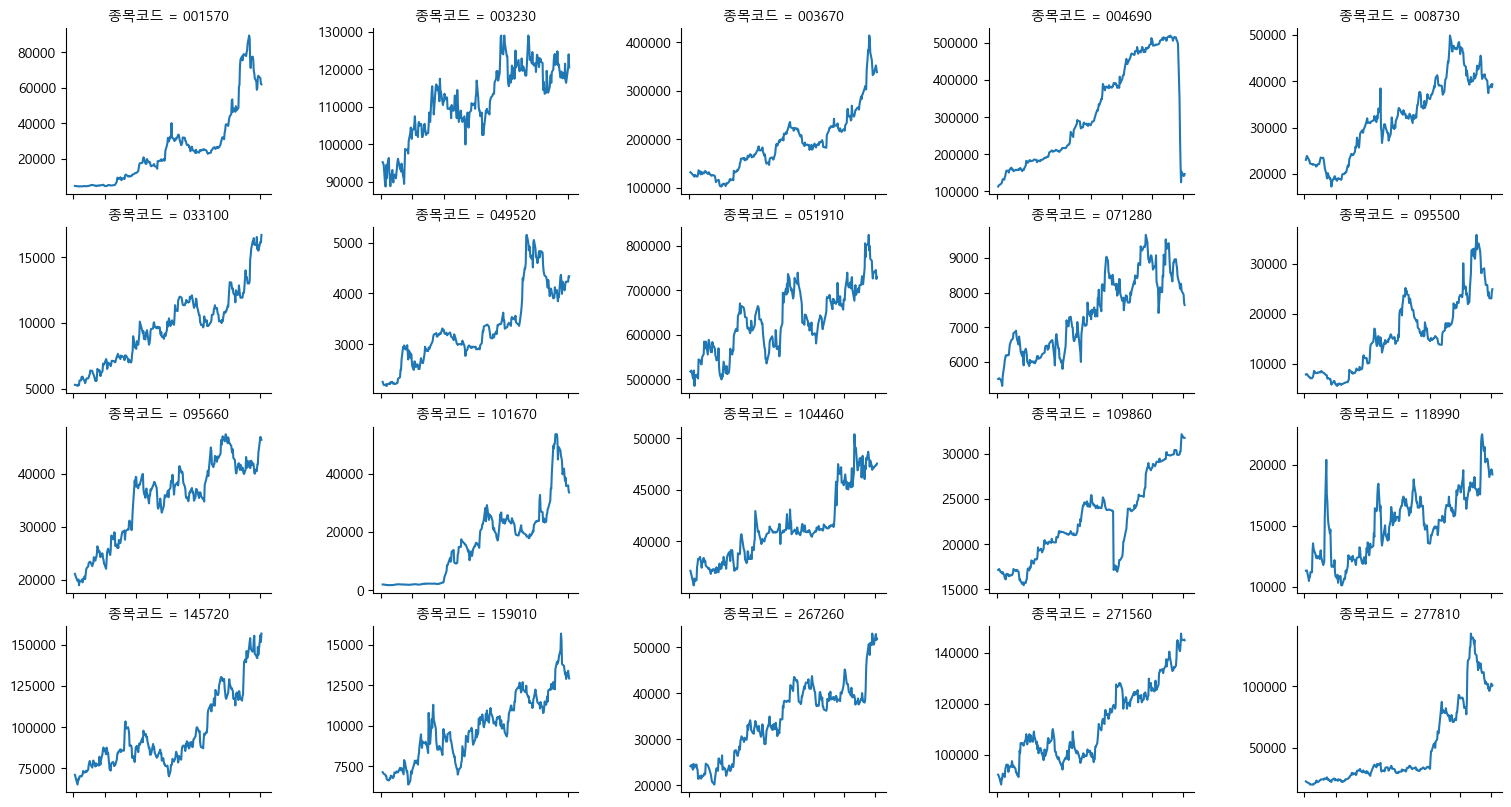

In [13]:
k_ratio_momentum = price_list[price_list['종목코드'].isin(
    data_bind.loc[k_ratio_rank <= 20, '종목코드'])]

plt.rc('font', family='Malgun Gothic')
g = sns.relplot(data=k_ratio_momentum,
                x='날짜',
                y='종가',
                col='종목코드',
                col_wrap=5,
                kind='line',
                facet_kws={
                    'sharey': False,
                    'sharex': True
                })
g.set(xticklabels=[])
g.set(xlabel=None)
g.set(ylabel=None)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)
plt.subplots_adjust(wspace=0.5, hspace=0.2)
plt.show()

기존 단순 모멘텀이 비해 훨씬 더 꾸준하게 우상향하는 종목들이 선택되었다.

## 퀄리티 전략

벤자민 그레이엄 이후 유지되고 있는 기본적 분석 혹은 가치 투자자들의 가장 중요한 투자 지표 중 하나는 기업의 우량성(퀄리티)이다. 벤저민 그레이엄은 종목 선정에 있어 유동 자산이 풍부하여 재무적으로 건전하고, 꾸준하게 이익을 달성하는 기업을 강조했다. 최고의 투자자로 꼽히는 워런 버핏의 종목 선정 기준 역시 실적의 강력한 성장 추세와 높은 자기자본 이익률로 알려져 있다.

그러나 어떠한 지표가 기업의 우량성을 나타내는지 한 마디로 정의하기에는 너무나 주관적이고 광범위해 쉽지 않다. 연구에 따르면 수익성, 성장성, 안정성이 높을 주식일수록 수익률이 높은 경향이 있다. 이 외에도 학계 혹은 업계에서 사용되는 우량성 관련 지표는 다음과 같이 요약할 수 있다.

1. 수익성: 기업이 돈을 얼마나 잘 버는가(ROE, ROA, 매출총이익률 등).
2. 수익의 안정성: 기업이 얼마나 안정적으로 돈을 버는가(ROE의 변동성 등).
3. 재무 구조: 기업의 재무 구조가 얼마나 안전한가(차입비율 등).
4. 이익의 성장: 기업의 이익 증가율이 얼마나 되는가(전년 대비 ROE 증가율 등).
5. 재무 신뢰도: 재무제표를 얼마나 신뢰할 수 있는가(회계 처리 방법 등).
6. 배당: 얼마나 주주 친화적인가(배당금, 신주발행, 자사주 매입 등.)
7. 투자: 얼마나 신사업에 투자를 하는가(총자산의 증가 등)

이 중 사람들이 가장 중요하게 여기는 것은 바로 수익성이다. 돈을 벌지 못하는 기업은 지속될 수 없기 때문이다. 기업의 규모가 크면 당연히 돈을 더 많이 벌기 때문에 단순히 수익의 양이 아닌, 기업의 규모에 비해 얼마를 버는지 표준화를 통해 비교해야 한다. {numref}`quality_table`는 널리 사용되고 있는 수익성 지표들이다.

```{table} 수익성 지표
:name: quality_table

| 지표 | 설명 | 분자 | 분모 |
| --- | --- | --- | --- |
| ROE(Return on Equity)	| 자기자본이익율 | 당기순이익 | 자본 |
| ROA(Return on Asset)	| 총자산이익률 | 당기순이익 | 자산 |
| ROIC(Return on Invested Capital) | 투하자본이익률 | 당기순이익 | 투하자본 |
| GP(Gross Profitability) | 매출총이익률 | 매출총이익 | 자산 혹은 자본 |
```

우량주 효과가 발생하는 이유 역시 사람들의 반응과 관계가 있다. 기업의 수익성이 높을 경우, 투자자들은 이익이 다시 원래 수준으로 빠르게 돌아갈 것이라 생각하지만, 실제로는 수익성이 높은 기업은 계속해서 높은 수익성을 보이는 경향이 있다. 반대로 기업의 수익성이 낮은 경우, 투자자들은 이익이 반등할 것이라 생각하지만 나쁜 기업은 계속해서 나쁜 경향이 있다.

#### 수익성별 포트폴리오의 수익률

영업수익성을 기준으로 구성된 포트폴리오의 수익률을 비교해보겠다. 프렌치 라이브러이에서 해당 데이터의 이름은 'Portfolios_Formed_on_OP' 이다. 단, 수익성 항목이 들어간 데이터들은 `pandas_datareader` 패키지에서 불러올 경우 인코딩 문제로 인해 오류가 발생하므로, 홈페이지에서 직접 파일을 다운로드 받도록 한다.

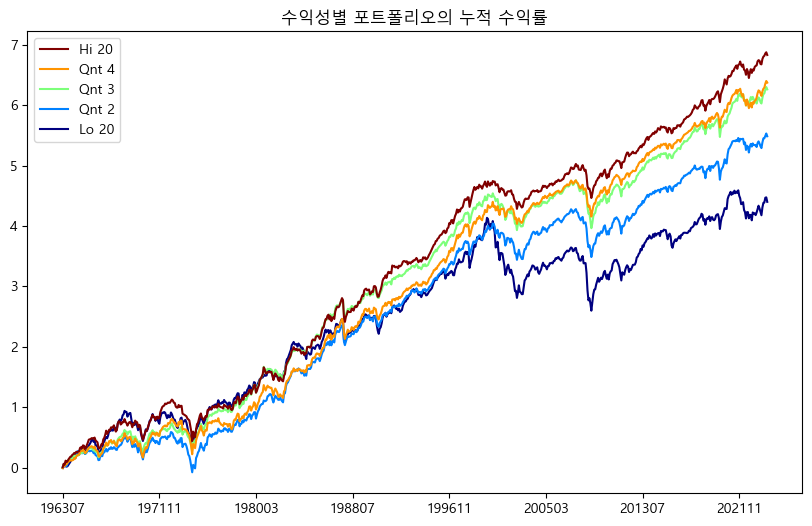

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

url = 'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Portfolios_Formed_on_OP_CSV.zip'
df_op = pd.read_csv(url, skiprows=24, encoding='cp1252', index_col=0)
end_point = np.where(pd.isna(df_op.iloc[:, 2]))[0][0]
df_op_vw = df_op.iloc[0:end_point][[
    'Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20'
]].apply(pd.to_numeric)
df_op_cum = np.log(1 + df_op_vw / 100).cumsum()

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

df_op_cum.plot(figsize=(10, 6),
               colormap=cm.jet,
               legend='reverse',
               title='수익성별 포트폴리오의 누적 수익률')
plt.show()

1. zip 파일 링크를 입력한다.
2. `read_csv()` 함수 내에 zip 파일 링크를 입력하면, 압축 파일 내의 CSV 파일을 불러올 수 있다. 또한 상위 행 24개는 데이터에 대한 설명이므로 `skiprows` 인자를 통해 무시해주며, 인코딩은 cp1252로, 인덱스는 첫번째 열로 설정한다.
3. 파일 내에는 월별 수익률, 연간 수익률, 포트폴리오 내 종목수 등 수많은 테이블이 포함되어 있다. 이 중 시가총액가중방식 포트폴리오에 해당하는 부분만 찾기 위해 `isna()` 함수를 통해 처음으로 na가 나타나는 지점(end_point)을 찾는다.
4. 시가총액가중방식 수익률에 해당하는 부분만 선택하며, 20%씩 나눈 열을 선택한다. 그 후 `apply(pd.to_numeric)` 를 통해 모든 열을 숫자 형태로 변경한다.
5. 로그 누적수익률을 계산한다.

누적수익률을 확인해보면, 수익성이 높을수록(Hi 20) 향후에도 지속적으로 수익률이 높으며, 수익성이 낮을수록(Lo 20) 향후에도 수익률이 낮은 '퀄리티 현상'이 존재한다. 이번에는 포트폴리오 별 통계값을 확인해보자.

In [26]:
factor_stat(df_op_vw)

,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20
연율화 수익률(산술),9.2200,10.3500,11.5500,11.7200,12.5000
연율화 수익률(기하),7.5000,9.4300,10.8400,11.0400,11.8800
연율화 변동성,19.6500,16.0900,15.5000,15.4500,15.5600
샤프지수,0.4693,0.6436,0.7448,0.7585,0.8031


수익성이 높을수록 수익률이 높고 변동성이 낮음을 확인할 수 있다.

### 우량성 포트폴리오 구하기

이번에는 국내 종목들 중 우량성(수익성)이 높은 종믁은 어떠한 것이 있는지 확인해보도록 하자.

In [27]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

engine = create_engine('mysql+pymysql://root:@127.0.0.1:3306/stock_db')

ticker_list = pd.read_sql("""
select * from kor_ticker
where 기준일 = (select max(기준일) from kor_ticker) 
and 종목구분 = '보통주';
""", con=engine)

fs_list = pd.read_sql("""
select * from kor_fs
where 계정 in ('당기순이익', '매출총이익', '영업활동으로인한현금흐름', '자산', '자본')
and 공시구분 = 'q';
""", con=engine)

engine.dispose()

먼저 DB에서 티커 테이블과 재무제표 테이블 중 수익성을 계산하는데 필요한 계정(당기순이익, 매출총이익, 영업활동으로인한현금흐름, 자산, 자본 / 분기 데이터)을 불러온다. 각종 수익성 지표들을 계산해보도록 하자.

In [28]:
fs_list = fs_list.sort_values(['종목코드', '계정', '기준일'])
fs_list['ttm'] = fs_list.groupby(['종목코드', '계정'], as_index=False)['값'].rolling(
    window=4, min_periods=4).sum()['값']
fs_list_clean = fs_list.copy()
fs_list_clean['ttm'] = np.where(fs_list_clean['계정'].isin(['자산', '자본']),
                                fs_list_clean['ttm'] / 4, fs_list_clean['ttm'])
fs_list_clean = fs_list_clean.groupby(['종목코드', '계정']).tail(1)

fs_list_pivot = fs_list_clean.pivot(index='종목코드', columns='계정', values='ttm')
fs_list_pivot['ROE'] = fs_list_pivot['당기순이익'] / fs_list_pivot['자본']
fs_list_pivot['GPA'] = fs_list_pivot['매출총이익'] / fs_list_pivot['자산']
fs_list_pivot['CFO'] = fs_list_pivot['영업활동으로인한현금흐름'] / fs_list_pivot['자산']

quality_list = ticker_list[['종목코드', '종목명']].merge(fs_list_pivot,
                                                  how='left',
                                                  on='종목코드')
quality_list.round(4).head()

,종목코드,종목명,당기순이익,매출총이익,영업활동으로인한현금흐름,자본,자산,ROE,GPA,CFO
0,000020,동화약품,216.0,1810.0,293.0,3690.25,4633.75,0.0585,0.3906,0.0632
1,000040,KR모터스,-130.0,171.0,-24.0,448.25,1623.50,-0.2900,0.1053,-0.0148
2,000050,경방,44.0,1262.0,293.0,7632.75,12781.75,0.0058,0.0987,0.0229
3,000070,삼양홀딩스,1059.0,5434.0,957.0,24893.75,45447.50,0.0425,0.1196,0.0211
4,000080,하이트진로,868.0,10632.0,-740.0,11239.50,35213.50,0.0772,0.3019,-0.0210


1. `sort_values()` 메서드를 통해 정렬을 한다.
2. '종목코드'와 '계정' 별로 그룹을 묶은 후 TTM 값을 구하기 위해 `rolling()` 메서드를 통해 4분기 합을 구한다. `min_periods=4`를 통해 4분기 데이터가 없는 경우는 계산하지 않는다.
3. 자산과 자본의 경우 재무상태표 항목이므로 합이 아닌 평균을 구하며, 나머지 항목은 합을 그대로 사용한다.
3. `tail(1)`을 통해 종목코드와 계정 별 최근 데이터만 선택한다.
4. `pivot()` 함수를 통해 가로로 긴 형태로 변경한다.
5. 수익성 지표에 해당하는 ROE, GPA, CFO를 각각 구한다.
4. 티커 테이블과 합쳐준다.

이제 각 수익성 지표의 순위를 구한다.

In [29]:
quality_list_copy = quality_list[['ROE', 'GPA', 'CFO']].copy()
quality_rank = quality_list_copy.rank(ascending=False, axis=0)

수익성 지표의 경우 값이 높을수록 좋으므로 `ascending = False`를 통해 내림차순 기준 순위를 구한다. 각 지표 별 상관관계를 살펴보도록 하자.

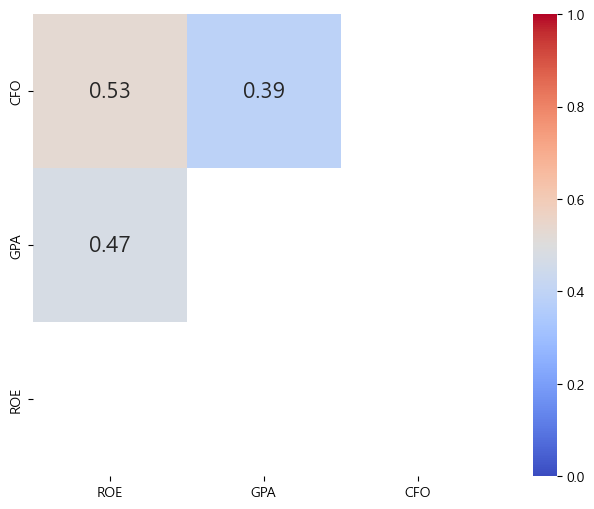

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

mask = np.triu(quality_rank.corr())
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(quality_rank.corr(),
            annot=True,
            mask=mask,
            annot_kws={"size": 16},
            vmin=0,
            vmax=1,
            center=0.5,
            cmap='coolwarm',
            square=True)
ax.invert_yaxis()
plt.show()

비슷한 수익성 지표임에도 불구하고 서로 간의 상관관계가 꽤 낮다. 따라서 지표를 통합적으로 고려하면 분산효과를 기대할 수 있다. 수익성이 높은 종목을 선택해보도록 하자.

In [31]:
quality_sum = quality_rank.sum(axis=1, skipna=False).rank()
quality_list.loc[quality_sum <= 20,
                 ['종목코드', '종목명', 'ROE', 'GPA', 'CFO']].round(4)

,종목코드,종목명,ROE,GPA,CFO
45,000990,DB하이텍,0.3809,0.4846,0.3791
405,011200,HMM,0.5503,0.4074,0.4414
1032,058630,엠게임,0.2649,0.7439,0.3745
1125,067160,아프리카TV,0.2571,0.7157,0.2290
1354,092130,이크레더블,0.3740,0.7525,0.2854
1378,094360,칩스앤미디어,0.2536,0.4532,0.2840
1449,101730,위메이드맥스,0.2983,0.7168,0.2924
1565,124560,태웅로직스,0.5002,0.4327,0.3479
1632,140860,파크시스템스,0.2653,0.5676,0.1918
1755,195870,해성디에스,0.4084,0.4397,0.3262


1. 위에서 구한 세개 지표들의 순위를 더한 후 다시 순위를 매긴다.
2. 최종 순위가 낮은 20 종목을 선택한다. 즉 하나의 지표보다 세개 지표가 골고루 낮은 종목을 선택한다.

## 마법공식

하나의 팩터만을 보고 투자하는 것보다, 둘 혹은 그 이상의 팩터를 결합해 투자해야 훨씬 좋은 포트폴리오를 구성할 수 있으며, 이러한 방법을 멀티팩터라고 한다. 그중에서도 밸류와 퀄리티의 조합은 전통적으로 많이 사용된 방법이며, 대표적인 예가 조엘 그린블라트의 '마법공식'이다. 이에 앞서, 퀄리티와 밸류 간의 관계, 마법공식의 정의와 구성 방법을 알아보겠다.

### 퀄리티와 밸류 간의 관계

투자의 정석 중 하나는 좋은 기업을 싸게 사는 것이다. 이를 팩터의 관점에서 이해하면 퀄리티 팩터와 밸류 팩터로 이해할 수도 있다.

여러 논문에 따르면 흔히 밸류 팩터와 퀄리티 팩터는 반대의 관계에 있다. 먼저 가치주들은 위험이 크기 때문에 시장에서 소외를 받아 저평가가 이루어지는 것이며, 이러한 위험에 대한 대가로 밸류 팩터의 수익률이 높다. 반대로 사람들은 우량주에 기꺼이 프리미엄을 지불하려 하기 때문에 퀄리티 팩터의 수익률이 높기도 하다. 이는 마치 동전의 양면과 같지만, 장기적으로 가치주와 우량주 모두 우수한 성과를 기록한다. 먼저 퀄리티 지표인 매출총이익과 밸류 지표인 PBR을 통해 둘 사이의 관계를 확인해 보자.

In [32]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

engine = create_engine('mysql+pymysql://root:@127.0.0.1:3306/stock_db')

value_list = pd.read_sql("""
select * from kor_value
where 기준일 = (select max(기준일) from kor_value)
and 지표 = 'PBR';
""", con=engine)

fs_list = pd.read_sql("""
select * from kor_fs
where 계정 in ('매출총이익', '자산')
and 공시구분 = 'y';
""", con=engine)

engine.dispose()

# 밸류 지표
value_list.loc[value_list['값'] < 0, '값'] = np.nan
value_pivot = value_list.pivot(index='종목코드', columns='지표', values='값')

# 퀄리티 지표
fs_list = fs_list.sort_values(['종목코드', '계정', '기준일'])
fs_list = fs_list.groupby(['종목코드', '계정']).tail(1)
fs_list_pivot = fs_list.pivot(index='종목코드', columns='계정', values='값')
fs_list_pivot['GPA'] = fs_list_pivot['매출총이익'] / fs_list_pivot['자산']

# 데이터 합치기
bind_rank = value_pivot['PBR'].rank().to_frame().merge(
    fs_list_pivot['GPA'].rank(ascending=False), how='inner', on='종목코드')

# 상관관계
bind_rank.corr()

,PBR,GPA
PBR,1.000000,-0.108244
GPA,-0.108244,1.000000


1. DB에서 밸류 테이블 중 PBR 데이터와 재무제표 테이블 중 매출총이익, 자산 항목(연간 재무제표 기준)을 불러온다.
2. 밸류 지표가 음수인 경우 nan으로 변환한 후, 피벗을 한다.
3. 재무제표 데이터 중 가장 최근 데이터를 이용해 매출총이익률을 구한다.
4. 두 지표의 순위를 각각 구한 후 `merge()` 함수를 통해 하나로 합친다. 매출총이익률의 경우 내림차순으로 순위를 구한다.
5. `corr()` 함수를 통해 순위의 상관관계를 구한다.

PBR과 GPA 간에는 음의 상관관계가 있음이 확인된다. 이번에는 PBR의 분위수별 GPA 평균값을 구해보도록 하자.

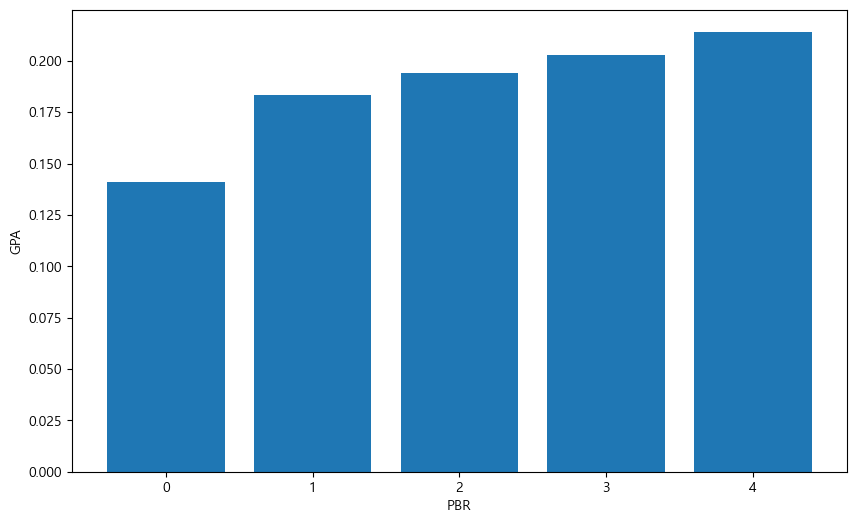

In [27]:
import matplotlib.pyplot as plt

bind_data = value_list.merge(fs_list_pivot, how='left', on='종목코드')
bind_data = bind_data.dropna()
bind_data['PBR_quantile'] = pd.qcut(bind_data['값'], q=5, labels=range(1, 6))
bind_group = bind_data.groupby('PBR_quantile').mean('GPA')

fig, ax = plt.subplots(figsize=(10, 6))
plt.rc('font', family='Malgun Gothic')
plt.bar(x=np.arange(5), height=bind_group['GPA'])
plt.xlabel('PBR')
plt.ylabel('GPA')

plt.show()

1. 밸류와 재무제표 테이블을 하나로 합친다.
2. `dropna()`를 통해 NA가 있는 데이터는 제거한다.
3. `qcut()` 함수를 이용해 PBR을 5분위수로 나누어준다.
4. `groupby()` 함수를 통해 PBR의 분위수별 그룹을 묶어 준 후, 각 그룹별 GPA의 평균을 구한다.
5. 그래프로 나타낸다.

그림에서 알 수 있듯이 PBR이 낮을수록 GPA도 낮으며, 즉 가치주일수록 우량성은 떨어진다. 반면에 PBR이 높을수록 GPA도 높으며, 이는 주식의 가격이 비쌀수록 우량성도 높다는 뜻이다. 이를 이용해 밸류 팩터와 퀄리티 팩터 간의 관계를 나타내면 다음과 같다.

```{figure} image/factor/tableqv.png
---
name: tableqv
---
밸류 팩터와 퀄리티 팩터간의 관계
```

주가가 쌀수록(저밸류) 기업의 우량성은 떨어지며(①번), 반대로 기업의 우량성이 좋으면 주식은 비싼 경향(③번)이 있다. 물론 우량성도 떨어지고 비싸기만한 주식(②번)을 사려는 사람들 아마 없을 것이다. 결과적으로 우리가 원하는 최고의 주식은 우량성이 있으면서도 가격은 싼 주식(④번)이다. 프렌치 라이브러리의 데이터를 이용해 4개 포트폴리오의 수익률 차이를 확인해보도록 하자.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

url = 'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/25_Portfolios_BEME_OP_5x5_CSV.zip'
df_qv = pd.read_csv(url, skiprows=21, encoding='cp1252', index_col=0)
end_point = np.where(pd.isna(df_qv.iloc[:, 2]))[0][0]
df_qv = df_qv.iloc[0:end_point].apply(pd.to_numeric)

df_qv.head()

,LoBM LoOP,BM1 OP2,BM1 OP3,BM1 OP4,LoBM HiOP,BM2 OP1,BM2 OP2,BM2 OP3,BM2 OP4,BM2 OP5,...,BM4 OP1,BM4 OP2,BM4 OP3,BM4 OP4,BM4 OP5,HiBM LoOP,BM5 OP2,BM5 OP3,BM5 OP4,HiBM HiOP
196307,1.5667,2.3959,0.1563,-1.2642,0.6103,0.9993,1.3035,0.2018,-0.4454,-1.7355,...,-1.7877,-0.4092,-5.2600,1.2625,2.4473,-1.9916,1.4799,2.7043,-1.7646,-1.0694
196308,5.9311,2.5545,6.4142,5.5728,5.8709,1.5049,3.8605,4.5227,5.2703,5.7711,...,7.7888,6.4719,15.5939,4.1357,11.9795,5.6974,5.4168,2.6932,6.3988,3.4264
196309,-5.0591,-4.6972,1.3918,-1.8810,-1.2090,-2.0466,-3.4478,0.5906,-2.4894,-4.7131,...,-1.5697,-0.3780,3.6947,-1.3282,-8.4785,-2.6355,-4.7089,-0.3408,-0.4710,-2.9148
196310,-2.1803,-3.7151,0.8348,3.9738,7.2644,-0.5754,1.9820,2.5652,-0.8234,2.6401,...,2.7924,0.4168,9.8824,6.6686,18.9219,1.2438,2.5739,2.0655,-2.1846,8.5136
196311,-3.1118,0.0362,-0.9976,1.0173,-2.6709,-5.2223,0.4643,2.0600,-0.8061,-1.8956,...,0.3592,-1.7549,-4.4519,0.9625,5.1808,1.0567,-2.4117,-1.5184,-0.4706,-2.8375


'25_Portfolios_BEME_OP_5x5'에 해당하는 데이터를 받아보면 밸류와 퀄리티 기준 각각 5분위로 나누어진 총 25개의 포트폴리오가 존재한다. 하나의 포트폴리오로 수익률을 살펴보기에는 포트폴리오 내 구성종목수가 너무 작으므로, 여러 포트폴리오의 평균을 통해 최종 포트폴리오를 구해보도록 하자.

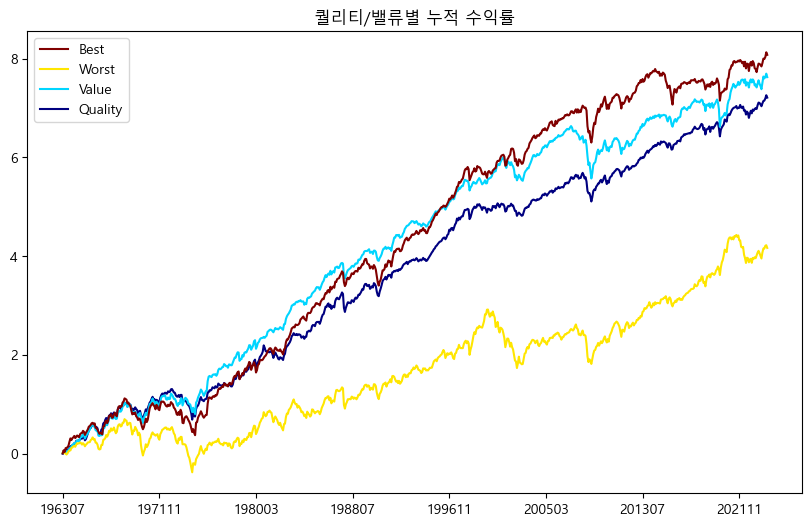

In [30]:
df_qv_quality = df_qv.loc[:, ['LoBM HiOP', 'BM2 OP5', 'BM3 OP5']].mean(axis=1) # Quality
df_qv_value = df_qv.loc[:, ['HiBM LoOP', 'BM5 OP2', 'BM5 OP3']].mean(axis=1) # Value
df_qv_worst = df_qv.loc[:, ['LoBM LoOP', 'BM1 OP2', 'BM2 OP1', 'BM2 OP2']].mean(axis=1) # Worst
df_qv_best = df_qv.loc[:, ['BM5 OP4', 'HiBM HiOP', 'BM4 OP4', 'BM4 OP5']].mean(axis=1) # Best
df_qv_bind = pd.concat([df_qv_quality, df_qv_value, df_qv_worst, df_qv_best], axis=1)
df_qv_bind.columns = ['Quality', 'Value', 'Worst', 'Best']
df_qv_bind_cum = np.log(1 + df_qv_bind / 100).cumsum()

plt.rc('font', family='Malgun Gothic')
df_qv_bind_cum.plot(figsize=(10, 6),
                    colormap=cm.jet,
                    legend='reverse',
                    title='퀄리티/밸류별 누적 수익률')
plt.show()

아래의 기준별로 포트폴리오를 선택한 후 수익률의 평균을 구한다.

- Quality: 밸류 기준 하위 1, 2, 3분위에서 수익성 상위 1분위 (높은 퀄리티/높은 밸류에이션)
- Value: 밸류 기준 상위 1분위에서 수익성 하위 1, 2, 3분위 (낮은 밸류에이션/낮은 퀄리티)
- Worst: 밸류 기준 하위 1, 2분위에서 수익성 하위 1, 2분위(높은 밸류에이션/낮은 퀄리티)
- Best: 밸류 기준 상위 1, 2분위에서 수익성 상위 1, 2분위(낮은 밸류에이션/높은 퀄리티)

결과를 살펴보면 Worst 포트폴리오의 수익률이 가장 낮다. 밸류와 퀄리티는 비슷하게 좋은 모습을 보이며, 두 가지 팩터를 동시에 고려할 경우 가장 높은 수익률을 보인다.

### 마법공식 이해하기

마법공식이란 고담 캐피탈의 설립자이자 전설적인 투자자 조엘 그린블라트에 의해 알려진 투자 방법이다. 그는 본인의 책 《주식 시장을 이기는 작은 책》에서 투자를 하는데 있어 중요한 두 가지 지표가 있으며, 이를 혼합하면 뛰어난 성과를 기록할 수 있다고 말했다.
 
첫 번째 지표는 '이익 수익률(Earnings Yield)' 로써 기업의 수익을 기업의 가치로 나는 값이다. 이는 PER의 역수와 비슷하며, 밸류 지표 중 하나이다. 두 번째 지표는 '투하자본 수익률(Return on Capital)' 로써 기업의 수익을 투자한 자본으로 나눈 값이다. 이는 ROE와도 비슷하며, 퀄리티 지표 중 하나이다. 마법공식은 이 두 가지 지표의 순위를 각각 구한 후 순위의 합 기준 상위 30~50개 종목을 1년간 보유한 후 매도하는 전략이다.

해당 전략은 국내 투자자들에게도 많이 사랑받는 전략이지만 두 지표를 계산하기 위한 데이터를 수집하기 어려워 많은 투자자들이 이율 대신 PER를 사용하고, 투하자본 수익률 대신 ROE를 사용한다. 그러나 우리가 수집한 데이터를 통해 충분히 원래의 마법공식을 구현할 수 있다.

```{table} 마법공식의 구성 요소
:name: magic_formula

| 팩터 | Value | Quality |
|----|----|----|
| 지표 | 이익 수익률 (Earnings Yield) | 투하자본 수익률 (Return On Capital) |
| 계산 | $\frac{이자\ 및\ 법인세\ 차감전이익}{기업\ 가치}$ | $\frac{이자\ 및\ 법인세\ 차감전이익}{투하\ 자본}$|
```

### 마법공식 포트폴리오

재무제표 항목을 통해 이율과 투하자본 수익률을 계산하고, 이를 통해 마법공식 포트폴리오를 구성해보도록 하자. 

In [10]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

engine = create_engine('mysql+pymysql://root:@127.0.0.1:3306/stock_db')

ticker_list = pd.read_sql("""
select * from kor_ticker
where 기준일 = (select max(기준일) from kor_ticker) 
and 종목구분 = '보통주';
""", con=engine)

fs_list = pd.read_sql("""
select * from kor_fs
where 계정 in ('매출액', '당기순이익', '법인세비용', '이자비용', '현금및현금성자산',
'부채', '유동부채', '유동자산', '비유동자산', '감가상각비')
and 공시구분 = 'q';
""", con=engine)

engine.dispose()

fs_list = fs_list.sort_values(['종목코드', '계정', '기준일'])
fs_list['ttm'] = fs_list.groupby(['종목코드', '계정'], as_index=False)['값'].rolling(
    window=4, min_periods=4).sum()['값']
fs_list_clean = fs_list.copy()
fs_list_clean['ttm'] = np.where(
    fs_list_clean['계정'].isin(['부채', '유동부채', '유동자산', '비유동자산']),
    fs_list_clean['ttm'] / 4, fs_list_clean['ttm'])

fs_list_clean = fs_list_clean.groupby(['종목코드', '계정']).tail(1)
fs_list_pivot = fs_list_clean.pivot(index='종목코드', columns='계정', values='ttm')

data_bind = ticker_list[['종목코드', '종목명', '시가총액']].merge(fs_list_pivot,
                                                       how='left',
                                                       on='종목코드')
data_bind['시가총액'] = data_bind['시가총액'] / 100000000

data_bind.head()

,종목코드,종목명,시가총액,감가상각비,당기순이익,매출액,법인세비용,부채,비유동자산,유동부채,유동자산,이자비용,현금및현금성자산
0,000020,동화약품,2354.620,111.0,216.0,3405.0,15.0,943.50,2348.50,752.25,2285.00,4.0,2061.0
1,000040,KR모터스,620.093,38.0,-130.0,1171.0,NaN,1175.50,958.75,965.50,664.75,75.0,676.0
2,000050,경방,2884.090,415.0,44.0,3892.0,-28.0,5149.25,11214.75,2252.00,1567.00,72.0,1051.0
3,000070,삼양홀딩스,6269.050,NaN,1059.0,33167.0,209.0,20553.75,27870.50,7592.75,17577.25,338.0,10346.0
4,000080,하이트진로,15780.100,1450.0,868.0,24975.0,346.0,23973.75,23049.75,16853.00,12163.50,387.0,19354.0


1. 티커 테이블과 재무제표 테이블 중 마법공식을 계산하는데 필요한 항목을 가져온다.
2. 재무제표 항목별 TTM값을 구하며, 재무상태표 항목(부채, 유동부채, 유동자산, 비유동자산)은 평균값을 구한다.
3. `pivot()` 함수를 통해 데이터를 피벗한다.
4. 티커 테이블과 재무제표 테이블을 합친다.
5. 티커 테이블에 있던 시가총액의 경우 원 단위인 반면, 재무제표 테이블의 숫자는 억 단위이므로 단위를 맞춰준다.

먼저 밸류 지표에 해당하는 이익수익률을 계산한다. 이익수익률은 이자 및 법인세 차감전이익(EBIT)을 기업가치(시가총액 + 순차입금)로 나눈 값이다. 이를 분해하면 다음과 같다.

$$ \begin{align} 이익\ 수익률 &= \frac{이자\ 및\ 법인세\ 차감전이익}{기업\ 가치} \\ &= \frac{이자\ 및\ 법인세\ 차감전이익}{시가총액 + 순차입금} 
\\ &= \frac{당기순이익 + 법인세 + 이자비용}{시가총액 + 총부채 - 여유자금}
\\ &= \frac{당기순이익 + 법인세 + 이자비용}{시가총액 + 총부채 - (현금 - max(0, 유동부채 - 유동자산 + 현금))} \end{align} $$

위 수식에 맞게 각 종목 별 이익 수익률을 계산해보도록 한다.

In [11]:
# 분자(EBIT)
magic_ebit = data_bind['당기순이익'] + data_bind['법인세비용'] + data_bind['이자비용']

# 분모
magic_cap = data_bind['시가총액']
magic_debt = data_bind['부채']

## 분모: 여유자금
magic_excess_cash = data_bind['유동부채'] - data_bind['유동자산'] + data_bind[
    '현금및현금성자산']
magic_excess_cash[magic_excess_cash < 0] = 0
magic_excess_cash_final = data_bind['현금및현금성자산'] - magic_excess_cash

magic_ev = magic_cap + magic_debt - magic_excess_cash_final

# 이익수익률
magic_ey = magic_ebit / magic_ev

1. 분자 부분인 이자 및 법인세 차감전 이익은 당기순이익에 법인세비용과 이자비용을 더해 계산한다.
2. 분모 부분은 시가총액, 총 부채, 여유자금 총 세 가지로 구성되어 있다. 시가총액과 총 부채는 재무제표 데이터를 그대로 사용하며, 여유자금의 경우 세 단계를 통해 계산한다.
3. 분자와 분모 부분을 나누어주면 이익수익률을 계산할 수 있다.

다음으로 퀄리티 지표에 해당하는 투하자본 수익률을 계산한다. 해당 값은 이자 및 법인세 차감전이익(EBIT)를 투하자본(IC)으로 나누어 계산되며, 이를 분해하면 다음과 같다.

$$ \begin{align}
투하자본\ 수익률 & = \frac{이자\ 및\ 법인세\ 차감전이익}{투하자본} \\
& = \frac{당기순이익 + 법인세 + 이자비용}{(유동자산 - 유동부채) + (비유동자산 - 감가상각비)}
\end{align} $$

In [12]:
# 투하자본 수익률
magic_ic = (data_bind['유동자산'] - data_bind['유동부채']) + (data_bind['비유동자산'] -
                                                      data_bind['감가상각비'])
magic_roc = magic_ebit / magic_ic

투하자본 수익률은 비교적 쉽게 계산할 수 있다. 분모에 해당하는 투하자본은 재무제표 항목을 그대로 사용하면 되며, 분자인 이자 및 법인세 차감전이익은 위에서 이미 구해둔 값을 사용하면 된다.

이제 두 지표를 활용해 마법공식 포트폴리오를 구성하겠다.

In [13]:
# 열 입력하기
data_bind['이익 수익률'] = magic_ey
data_bind['투하자본 수익률'] = magic_roc

magic_rank = (magic_ey.rank(ascending=False, axis=0) +
              magic_roc.rank(ascending=False, axis=0)).rank(axis=0)
data_bind.loc[magic_rank <= 20, ['종목코드', '종목명', '이익 수익률', '투하자본 수익률']].round(4)

,종목코드,종목명,이익 수익률,투하자본 수익률
43,000950,전방,0.4438,0.6459
147,003120,일성신약,1.6664,0.3273
224,005010,휴스틸,0.8132,0.3299
405,011200,HMM,2.2354,0.4807
728,035080,그래디언트,0.4280,0.3700
735,035510,신세계 I&C,0.5031,0.3408
766,036710,심텍홀딩스,0.3454,0.4030
814,039560,다산네트웍스,1.0765,0.4090
1263,083450,GST,0.3528,0.3207
1277,084650,랩지노믹스,0.5227,0.2862


1. '이익 수익률'과 '투하자본 수익률' 열에 위에서 계산한 값을 입력한다.
2. 두 열의 순위를 각각 구한 후, 이 두 값을 합친다. 그 후 다시 합 기준으로 순위를 구한다.
3. 최종 순위가 20위 이내인 종목을 선택한다.

전체 종목과 선택된 종목들의 차이를 시각화 해보도록 하자.

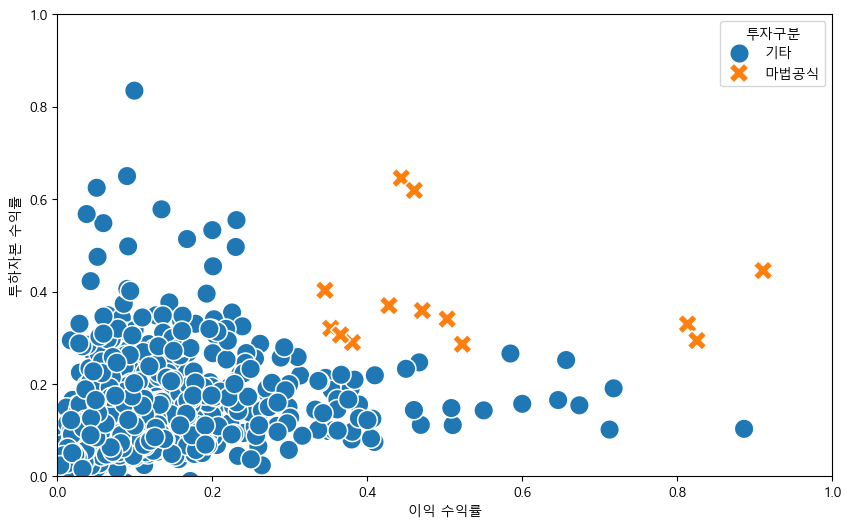

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

data_bind['투자구분'] = np.where(magic_rank <= 20, '마법공식', '기타')

plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(data=data_bind,
                x='이익 수익률',
                y='투하자본 수익률',
                hue='투자구분',
                style='투자구분',
                s=200)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

전체 종목 중 마법공식에 해당하는 종목들이 우측 상단, 즉 이익 수익률이 높고 투하자본 수익률도 높은 지점에 위치하고 있다.

## 섹터 중립 포트폴리오

팩터 전략의 단점 중 하나는 선택된 종목들이 특정 섹터로 쏠리는 경우가 있다는 점이다. 특히 과거 수익률을 토대로 종목을 선정하는 모멘텀 전략은 특정 섹터의 호황기에 동일한 섹터의 모든 종목이 함께 움직이는 경향이 있어 이러한 쏠림이 심할 수 있다.

먼저 12개월 모멘텀을 이용한 포트폴리오 구성 방법을 다시 살펴보자.

In [15]:
from sqlalchemy import create_engine
import pandas as pd
from scipy.stats import zscore

engine = create_engine('mysql+pymysql://root:@127.0.0.1:3306/stock_db')

ticker_list = pd.read_sql("""
select * from kor_ticker
where 기준일 = (select max(기준일) from kor_ticker) 
	and 종목구분 = '보통주';
""", con=engine)

sector_list = pd.read_sql("""
select * from kor_sector
where 기준일 = (select max(기준일) from kor_ticker) ;	
""", con=engine)

price_list = pd.read_sql("""
select 날짜, 종가, 종목코드
from kor_price
where 날짜 >= (select (select max(날짜) from kor_price) - interval 1 year);
""", con=engine)

engine.dispose()

price_pivot = price_list.pivot(index='날짜', columns='종목코드', values='종가')
ret_list = pd.DataFrame(data=(price_pivot.iloc[-1] / price_pivot.iloc[0]) - 1,
                        columns=['return'])

DB에서 티커 테이블과 섹터 테이블, 가격 테이블을 불러온 후, 12개월 수익률을 구한다.

In [16]:
data_bind = ticker_list[['종목코드',
                         '종목명']].merge(sector_list[['CMP_CD', 'SEC_NM_KOR']],
                                       how='left',
                                       left_on='종목코드',
                                       right_on='CMP_CD').merge(ret_list,
                                                                how='left',
                                                                on='종목코드')

data_bind.head()

,종목코드,종목명,CMP_CD,SEC_NM_KOR,return
0,000020,동화약품,000020,건강관리,-0.312000
1,000040,KR모터스,000040,경기관련소비재,-0.198124
2,000050,경방,000050,경기관련소비재,-0.325240
3,000070,삼양홀딩스,000070,소재,-0.151943
4,000080,하이트진로,000080,필수소비재,-0.393531


티커 테이블과 섹터 테이블, 수익률 테이블을 하나로 합쳐준다.

KeyError: 'SEC_NM_KOR'

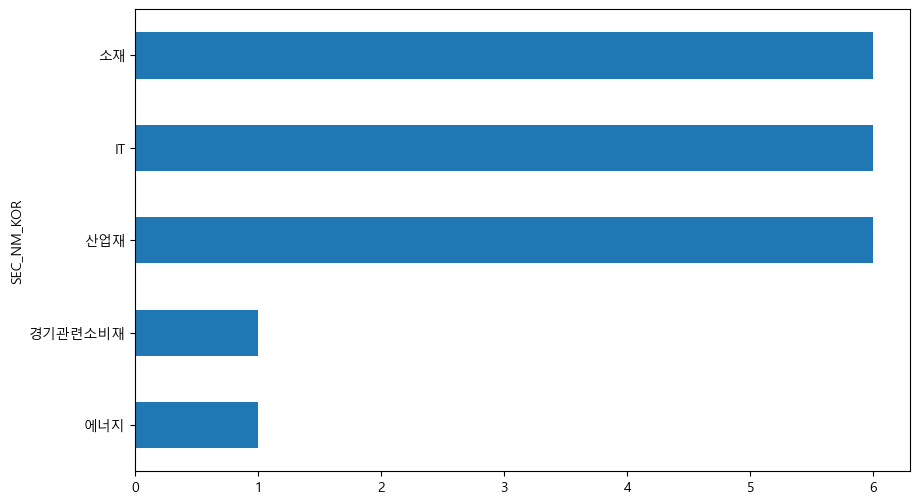

In [17]:
import matplotlib.pyplot as plt

data_bind['rank'] = data_bind['return'].rank(axis=0, ascending=False)
sector_count = pd.DataFrame(data_bind.loc[data_bind['rank'] <= 20,
                                          'SEC_NM_KOR'].value_counts())
plt.rc('font', family='Malgun Gothic')
sector_count.plot.barh(figsize=(10, 6), legend=False)
plt.gca().invert_yaxis()

for y, x in enumerate(sector_count['SEC_NM_KOR']):
    plt.annotate(str(x), xy=(x, y), va='center')

1. `rank()` 함수를 통해 12개월 수익률 열의 순위를 구하며, 모멘텀의 경우 지표가 높을수록 좋으므로 `ascending = False` 인자를 통해 내림차순으로 순위를 구한다.
2. 모멘텀이 높은 20 종목들의 섹터를 선택한 후, `value_counts()` 메서드를 통해 섹터별 갯수를 구한다.
3. 폰트를 지정한다.
4. `barh()` 함수를 통해 수평 막대 그래프를 그린다.
4. 숫자가 큰 막대가 위로 가게하기 위해 `gca().invert_yaxis()`를 이용해 순서를 뒤집어준다.
5. `annotate()` 함수를 이용해 각 막대의 끝에 갯수에 해당하는 글자를 추가한다.

간혹 특정 섹터의 모멘텀이 매우 좋을 경우, 해당 섹터에 쏠림이 심한 경우가 있다. 이러한 섹터 쏠림 현상을 제거한 섹터 중립 포트폴리오를 구성해보도록 하자.

KeyError: 'SEC_NM_KOR'

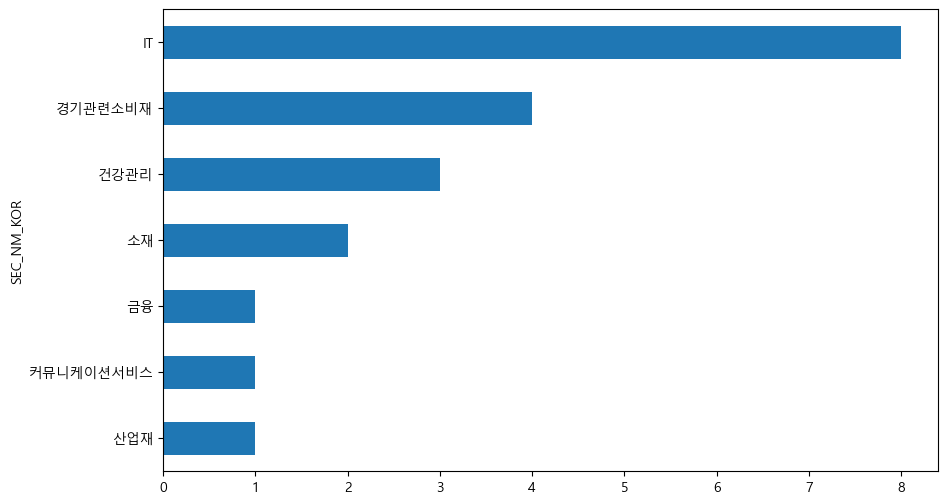

In [18]:
data_bind.loc[data_bind['SEC_NM_KOR'].isnull(), 'SEC_NM_KOR'] = '기타'
data_bind['z-score'] = data_bind.groupby(
    'SEC_NM_KOR', dropna=False, group_keys=False)['return'].apply(zscore, nan_policy='omit')
data_bind['z-rank'] = data_bind['z-score'].rank(axis=0, ascending=False)
sector_neutral_count = pd.DataFrame(data_bind.loc[data_bind['z-rank'] <= 20,
                                                  'SEC_NM_KOR'].value_counts())

plt.rc('font', family='Malgun Gothic')
sector_neutral_count.plot.barh(figsize=(10, 6), legend=False)
plt.gca().invert_yaxis()

for y, x in enumerate(sector_neutral_count['SEC_NM_KOR']):
    plt.annotate(str(x), xy=(x, y), va='center')

1. 섹터 정보가 비어있는 종목에는 섹터를 '기타'로 입력한다.
2. 먼저 `groupby()` 함수를 통해 섹터별 그룹을 묶는다. 그 후 `apply()` 함수를 통해 수익률 열에 대해 그룹별로 Z-Score를 구해 정규화를 해준다. Z-Score는 $\frac{x-\mu}{\sigma}$로 계산된다.
3. 정규화된 모멘텀이 높은 20 종목들의 섹터를 선택한 후, `value_counts()` 메서드를 통해 섹터별 갯수를 구한다.
3. 폰트를 지정한다.
4. 그림으로 나타낸다.

이처럼 `groupby()` 함수를 통해 손쉽게 그룹별 중립화를 할 수 있으며, 글로벌 투자를 하는 경우에는 지역, 국가, 섹터별로도 중립화된 포트폴리오를 구성하기도 한다.

## 이상치 데이터 처리 및 팩터의 결합

훨씬 안정적인 퀀트 포트폴리오를 구성하기 위해서는 팩터 데이터를 어떻게 처리하여 결합할지에 대해서도 알고 있어야 하므로, 이러한 점에 대해 살펴보도록 하자.

모든 데이터 분석에서 중요한 문제 중 하나가 이상치(극단치, Outlier) 데이터를 어떻게 처리할 것인가이다. 과거 12개월 수익률이 10배인 주식이 과연 모멘텀 관점에서 좋기만 한 주식인지, ROE가 100%를 넘는 주식이 과연 퀄리티 관점에서 좋기만 한 주식인지 고민이 되기 마련이다. 따라서 이러한 이상치를 제외하고 분석할지, 포함해서 분석할지를 판단해야 한다. 만일 이상치를 포함한다면 그대로 사용할 것인지, 보정해 사용할 것인지도 판단해야 한다.

우리가 가지고 있는 PBR 데이터에서 이상치 데이터를 탐색해보자.

In [19]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

engine = create_engine('mysql+pymysql://root:@127.0.0.1:3306/stock_db')

value_list = pd.read_sql("""
select * from kor_value
where 기준일 = (select max(기준일) from kor_value);
""", con=engine)

engine.dispose()

value_pbr = value_list[value_list['지표'] == 'PBR']

print(value_pbr['값'].max(), '\n', value_pbr['값'].min())

46.9779 
 -3.6975


먼저 밸류 테이블을 불러온 후 PBR 데이터만 선택한다. PBR의 최대값과 최소값을 확인해보면 값이 매우 큰 것을 확인할 수 있다.

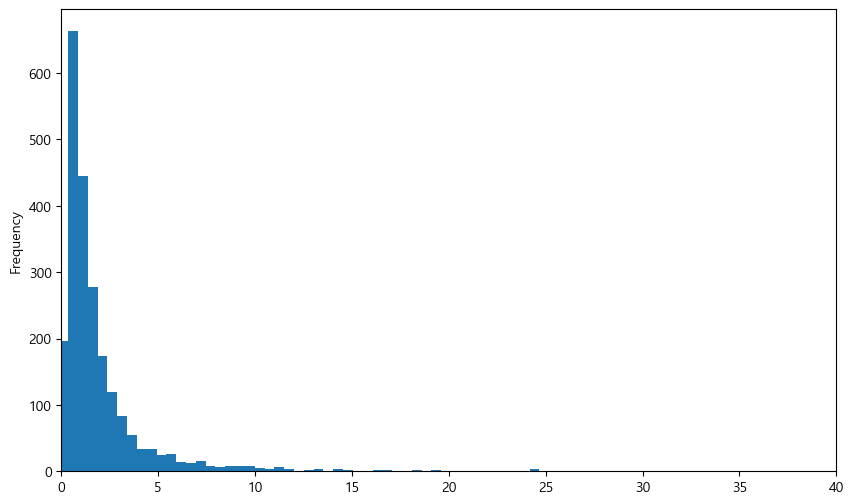

In [20]:
import matplotlib.pyplot as plt

value_pbr['값'].plot.hist(bins=100, figsize=(10, 6))
plt.xlim(0, 40)
plt.show()

국내 종목들의 PBR을 히스토그램으로 그려보면 오른쪽으로 꼬리가 매우 긴 분포를 보인다. 이는 PBR이 극단적으로 큰 이상치 데이터가 있기 때문이다. 이처럼 모든 팩터 데이터에는 극단치가 있기 마련이며, 이를 처리하는 방법을 알아보도록 하자.

### 트림(Trim): 이상치 데이터 삭제

트림은 이상치 데이터를 삭제하는 방법이다. 위의 예제에서 이상치에 해당하는 상하위 1% 데이터를 삭제하겠다.

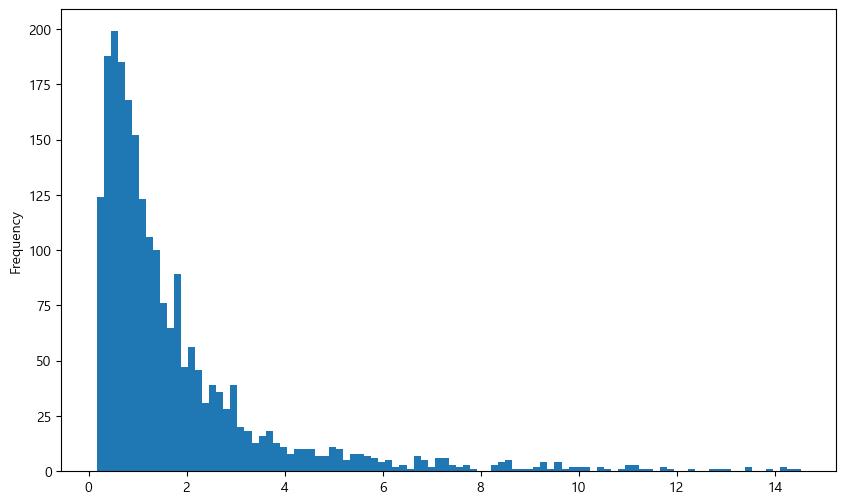

In [21]:
q_low = value_pbr['값'].quantile(0.01)
q_hi = value_pbr['값'].quantile(0.99)

value_trim = value_pbr.loc[(value_pbr['값'] > q_low) & (value_pbr['값'] < q_hi),
                           ['값']]

value_trim.plot.hist(figsize=(10, 6), bins=100, legend=False)
plt.show()

`quantile()` 함수를 통해 백분위를 구한 후 상하위 1%에 해당하는 데이터를 제외한 데이터만 선택했다. 결과적으로 지나치게 PBR이 낮은 종목과 높은 종목은 제거되어 $x$축의 스케일이 많이 줄어든 모습이다.

평균이나 분산 같이 통계값을 구하는 과정에서는 이상치 데이터를 제거하는 것이 바람직할 수 있다. 그러나 팩터를 이용해 포트폴리오를 구하는 과정에서 해당 방법은 조심스럽게 사용되어야 한다. 데이터의 손실이 발생하게 되며, 제거된 종목 중 정말로 좋은 종목이 있을 수도 있기 때문이다.

### 윈저라이징(Winsorizing): 이상치 데이터 대체

이상치 데이터를 다른 데이터로 대체하는 윈저라이징 방법을 사용할 수도 있다. 예를 들어 상위 1%를 초과하는 데이터는 1% 값으로 대체하며, 하위 1% 미만의 데이터는 1% 데이터로 대체한다. 즉, 좌우로 울타리를 쳐놓고 해당 범위를 넘어가는 값을 강제로 울타리에 맞춰준다.

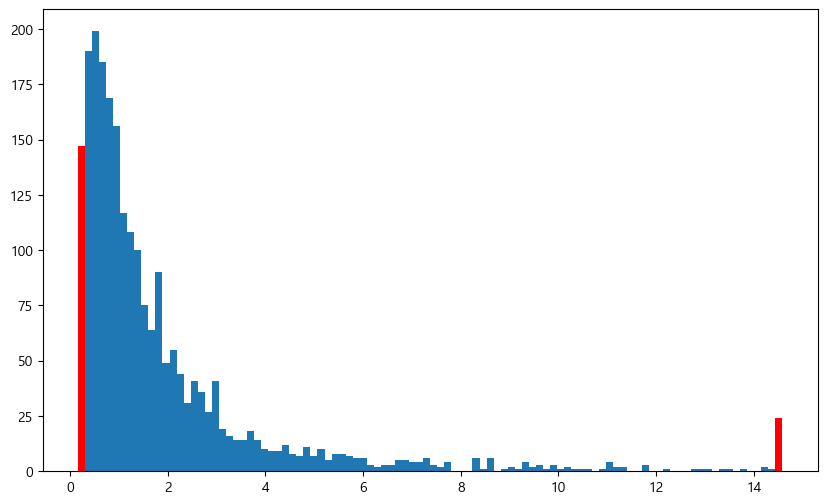

In [22]:
value_winsor = value_pbr[['값']].copy()
value_winsor.loc[value_winsor["값"] < q_low, '값'] = q_low
value_winsor.loc[value_winsor["값"] > q_hi, '값'] = q_hi

fig, ax = plt.subplots(figsize=(10, 6))
n, bins, patches = plt.hist(value_winsor, bins=100)
patches[0].set_fc('red')
patches[-1].set_fc('red')
plt.show()

이번에는 값이 상하위 1%를 벗어나는 경우, 1%에 해당하는 값으로 대체하였다. 그림을 살펴보면 $x$축 양 끝부분의 막대(붉은색)가 길어진 것을 확인할 수 있다.

### 팩터의 결합 방법

앞서 밸류 지표의 결합, 퀄리티 지표의 결합, 마법공식 포트폴리오를 구성할 때는 단순히 순위를 더하는 방법을 사용했다. 물론 투자 종목수가 얼마 되지 않거나, 개인 투자자의 입장에서는 이러한 방법이 가장 단순하면서도 효과적일수 있다. 그러나 전문투자자가 포트폴리오를 구성하거나 팩터를 분석하는 업무를 할 경우 이처럼 단순히 순위를 더하는 방법은 여러 가지 문제를 안고 있다.

각 밸류 지표의 순위를 구한 후 히스토그램으로 나타내보자.

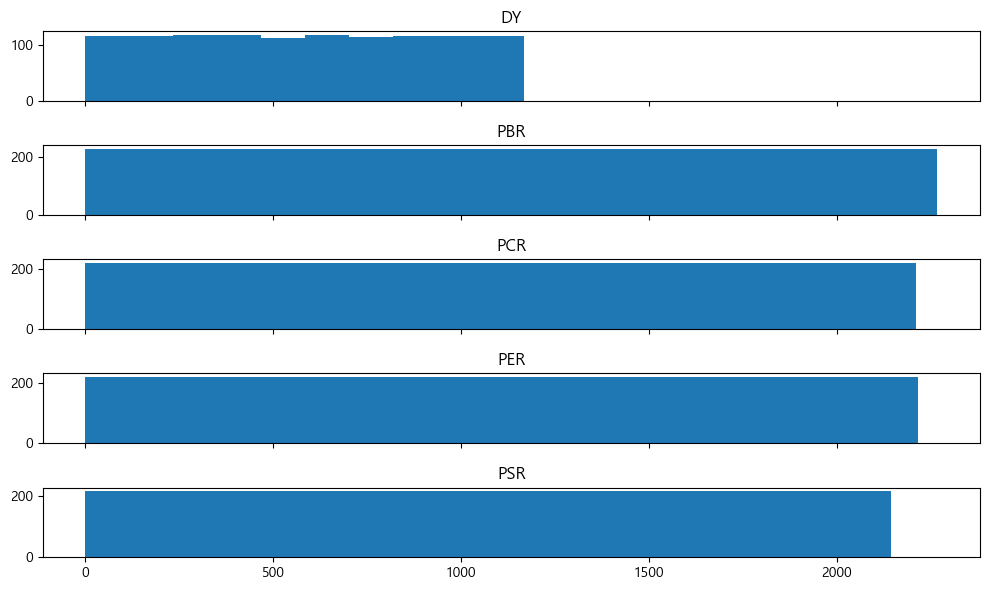

In [23]:
value_pivot = value_list.pivot(index='종목코드', columns='지표', values='값')
value_rank = value_pivot.rank(axis=0)

fig, axes = plt.subplots(5, 1, figsize=(10, 6), sharex=True)
for n, ax in enumerate(axes.flatten()):
    ax.hist(value_rank.iloc[:, n])
    ax.set_title(value_rank.columns[n], size=12)

fig.tight_layout()

그림에서 알 수 있듯이 순위를 구하는 것의 가장 큰 장점은 극단치로 인한 효과가 사라진다는 점과 균등한 분포를 가진다는 점이다. 그러나 각 지표의 $x$축을 보면 최댓값이 서로 다르다. 이는 지표별 결측치로 인해 유효 데이터의 갯수가 달라 나타나는 현상이다.

In [52]:
value_pivot.isna().sum()

지표
DY     1164
PBR      65
PCR     121
PER     117
PSR     188
dtype: int64

각 열의 na 개수를 확인해보면 그 결과가 모두 다르며, 특히 배당 수익률의 경우 절반 정도가 na 데이터다. 따라서 서로 다른 범위의 분포를 단순히 합치는 것은 좋은 방법이 아니다. 예를 들어 A, B, C, D 팩터에 각각 비중을 25%, 25%, 25%, 25% 부여해 포트폴리오를 구성한다고 가정해보자. 각 순위는 분포의 범위가 다르므로, 순위와 비중의 가중평균을 통해 포트폴리오를 구성하면 왜곡된 결과를 발생시킨다.

이러한 문제를 해결하는 가장 좋은 방법은 순위를 구한 후 이를 Z-Score로 정규화하는 것이다.

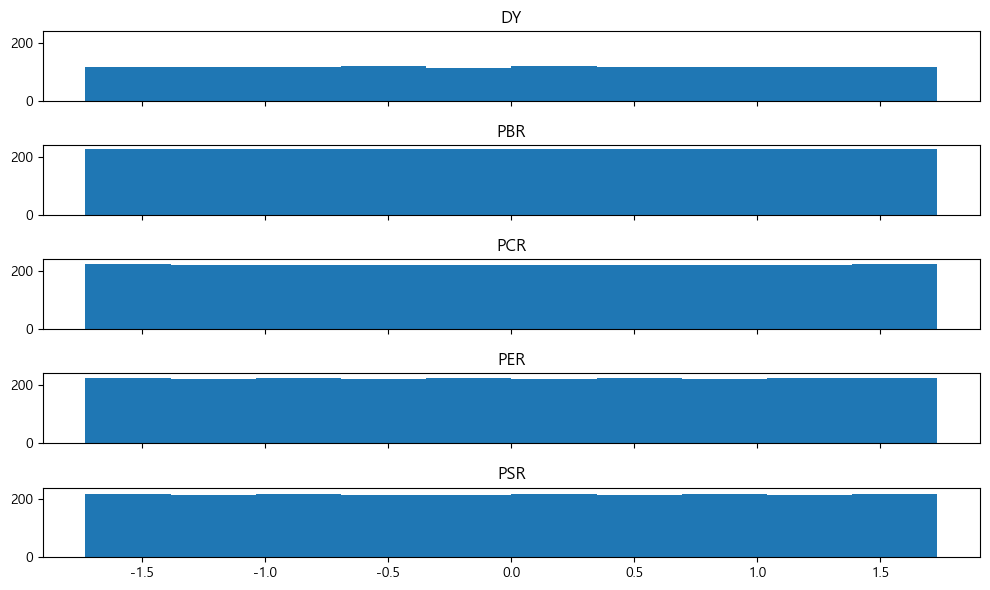

In [24]:
from scipy.stats import zscore

value_rank_z = value_rank.apply(zscore, nan_policy='omit')

fig, axes = plt.subplots(5, 1, figsize=(10, 6), sharex=True, sharey=True)
for n, ax in enumerate(axes.flatten()):
    ax.hist(value_rank_z.iloc[:, n])
    ax.set_title(value_rank.columns[n], size=12)

fig.tight_layout()
plt.show()

앞서 구해진 순위에 `apply(zscore)` 함수를 통해 정규화를 해준다. 기본적으로 순위의 분포가 가진 극단치 효과가 사라지는 점과 균등 분포의 장점을 유지하고 있으며, 분포의 범위 역시 거의 동일하게 바뀌었다. 이처럼 여러 팩터를 결합해 포트폴리오를 구성하고자 하는 경우, 먼저 각 팩터(지표)별 순위를 구한 후 이를 정규화한 뒤 더해야 왜곡 효과가 제거되어 안정적인 포트폴리오가 된다.

$$Z - Score(Rank(Factor\ A)) + Z - Score(Rank(Factor\ B)) +\dots + Z - Score(Rank(Factor\ N))$$

## 멀티팩터 포트폴리오

앞에서 배웠던 팩터 이론들과 결합 방법들을 응용해 멀티팩터 포트폴리오를 구성해보자. 각 팩터에 사용되는 지표는 다음과 같다.

- 퀄리티: 자기자본이익률(ROE), 매출총이익(GPA), 영업활동현금흐름(CFO)
- 밸류: PER, PBR, PSR, PCR, DY
- 모멘텀: 12개월 수익률, K-Ratio

In [25]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import zscore
import matplotlib.pyplot as plt

engine = create_engine('mysql+pymysql://root:@127.0.0.1:3306/stock_db')

ticker_list = pd.read_sql("""
select * from kor_ticker
where 기준일 = (select max(기준일) from kor_ticker) 
	and 종목구분 = '보통주';
""", con=engine)

fs_list = pd.read_sql("""
select * from kor_fs
where 계정 in ('당기순이익', '매출총이익', '영업활동으로인한현금흐름', '자산', '자본')
and 공시구분 = 'q';
""", con=engine)

value_list = pd.read_sql("""
select * from kor_value
where 기준일 = (select max(기준일) from kor_value);
""", con=engine)

price_list = pd.read_sql("""
select 날짜, 종가, 종목코드
from kor_price
where 날짜 >= (select (select max(날짜) from kor_price) - interval 1 year);
""", con=engine)

sector_list = pd.read_sql("""
select * from kor_sector
where 기준일 = (select max(기준일) from kor_ticker);	
""", con=engine)

engine.dispose()

먼저 티커, 재무제표, 가치지표, 주가, 섹터 테이블을 불러온다.

In [26]:
fs_list = fs_list.sort_values(['종목코드', '계정', '기준일'])
fs_list['ttm'] = fs_list.groupby(['종목코드', '계정'], as_index=False)['값'].rolling(
    window=4, min_periods=4).sum()['값']
fs_list_clean = fs_list.copy()
fs_list_clean['ttm'] = np.where(fs_list_clean['계정'].isin(['자산', '지배기업주주지분']),
                                fs_list_clean['ttm'] / 4, fs_list_clean['ttm'])
fs_list_clean = fs_list_clean.groupby(['종목코드', '계정']).tail(1)

fs_list_pivot = fs_list_clean.pivot(index='종목코드', columns='계정', values='ttm')
fs_list_pivot['ROE'] = fs_list_pivot['당기순이익'] / fs_list_pivot['자본']
fs_list_pivot['GPA'] = fs_list_pivot['매출총이익'] / fs_list_pivot['자산']
fs_list_pivot['CFO'] = fs_list_pivot['영업활동으로인한현금흐름'] / fs_list_pivot['자산']

fs_list_pivot.round(4).head()

계정,당기순이익,매출총이익,영업활동으로인한현금흐름,자본,자산,ROE,GPA,CFO
종목코드,,,,,,,,
000020,216.0,1810.0,293.0,14761.0,4633.75,0.0146,0.3906,0.0632
000040,-130.0,171.0,-24.0,1793.0,1623.50,-0.0725,0.1053,-0.0148
000050,44.0,1262.0,293.0,30531.0,12781.75,0.0014,0.0987,0.0229
000060,9017.0,NaN,21821.0,56135.0,282126.25,0.1606,NaN,0.0773
000070,1059.0,5434.0,957.0,99575.0,45447.50,0.0106,0.1196,0.0211


퀄리티 지표를 계산하기 위해 TTM 기준 ROE, GPA, CFO를 계산한다.

In [27]:
value_list.loc[value_list['값'] <= 0, '값'] = np.nan
value_pivot = value_list.pivot(index='종목코드', columns='지표', values='값')

value_pivot.head()

지표,DY,PBR,PCR,PER,PSR
종목코드,,,,,
000020,0.0214,0.6381,8.0362,10.9010,0.6915
000040,NaN,1.3834,NaN,NaN,0.5295
000050,0.0119,0.3779,9.8433,65.5475,0.7410
000070,0.0478,0.2518,6.5507,5.9198,0.1890
000080,0.0422,1.4040,NaN,18.1798,0.6318


가치 지표의 경우 음수를 제거한 후 행으로 긴 형태로 변경한다.

In [29]:
price_pivot = price_list.pivot(index='날짜', columns='종목코드', values='종가')
ret_list = pd.DataFrame(data=(price_pivot.iloc[-1] / price_pivot.iloc[0]) - 1,
                        columns=['12M'])

ret = price_pivot.pct_change().iloc[1:]
ret_cum = np.log(1 + ret).cumsum()

x = np.array(range(len(ret)))
k_ratio = {}

for i in range(0, len(ticker_list)):

    ticker = ticker_list.loc[i, '종목코드']

    try:
        y = ret_cum.loc[:, price_pivot.columns == ticker]
        reg = sm.OLS(y, x).fit()
        res = float((reg.params / reg.bse).iloc[0])
    except:
        res = np.nan

    k_ratio[ticker] = res

k_ratio_bind = pd.DataFrame.from_dict(k_ratio, orient='index').reset_index()
k_ratio_bind.columns = ['종목코드', 'K_ratio']

k_ratio_bind.head()

,종목코드,K_ratio
0,000020,-46.287776
1,000040,-44.112467
2,000050,-54.199036
3,000070,-21.065093
4,000080,-83.136329


먼저 가격 테이블을 이용해 최근 12개월 수익률을 구한다. 또한 로그 누적수익률을 통해 각 종목 별 K-Ratio를 계산한다.

In [58]:
data_bind = ticker_list[['종목코드', '종목명']].merge(
    sector_list[['CMP_CD', 'SEC_NM_KOR']],
    how='left',
    left_on='종목코드',
    right_on='CMP_CD').merge(
        fs_list_pivot[['ROE', 'GPA', 'CFO']], how='left',
        on='종목코드').merge(value_pivot, how='left',
                         on='종목코드').merge(ret_list, how='left',
                                          on='종목코드').merge(k_ratio_bind,
                                                           how='left',
                                                           on='종목코드')

data_bind.loc[data_bind['SEC_NM_KOR'].isnull(), 'SEC_NM_KOR'] = '기타'
data_bind = data_bind.drop(['CMP_CD'], axis=1)

data_bind.round(4).head()

,종목코드,종목명,SEC_NM_KOR,ROE,GPA,CFO,DY,PBR,PCR,PER,PSR,12M,K_ratio
0,000020,동화약품,건강관리,0.0146,0.3906,0.0632,0.0214,0.6381,8.0362,10.9010,0.6915,-0.3120,-46.2878
1,000040,KR모터스,경기관련소비재,-0.0725,0.1053,-0.0148,NaN,1.3834,NaN,NaN,0.5295,-0.1981,-44.1125
2,000050,경방,경기관련소비재,0.0014,0.0987,0.0229,0.0119,0.3779,9.8433,65.5475,0.7410,-0.3252,-54.1990
3,000070,삼양홀딩스,소재,0.0106,0.1196,0.0211,0.0478,0.2518,6.5507,5.9198,0.1890,-0.1519,-21.0651
4,000080,하이트진로,필수소비재,0.0193,0.3019,-0.0210,0.0422,1.4040,NaN,18.1798,0.6318,-0.3935,-83.1363


1. 티커, 섹터, 퀄리티, 밸류, 12개월 수익률, K-ratio 테이블을 하나로 합친다.
2. 섹터 정보가 없는 경우 '기타'를 입력한다.
3. CMP_CD(종목코드)는 중복되는 열이므로 `drop()` 메서드를 통해 제거한다. 

이번에는 각 섹터별로 아웃라이어를 제거한 후 순위와 Z-Score를 구하는 함수(`col_clean`)를 만들어보도록 하겠다.

In [59]:
def col_clean(df, cutoff=0.01, asc=False):

    q_low = df.quantile(cutoff)
    q_hi = df.quantile(1 - cutoff)

    df_trim = df[(df > q_low) & (df < q_hi)]

    if asc == False:
        df_z_score = df_trim.rank(axis=0, ascending=False).apply(
            zscore, nan_policy='omit')
    if asc == True:
        df_z_score = df_trim.rank(axis=0, ascending=True).apply(
            zscore, nan_policy='omit')

    return(df_z_score)

1. cutoff 즉 아웃라이어는 1%로 설정하며, asc는 False로 설정한다.
2. 아웃라이어 기준에 해당하는 q_low와 q_hi을 계산한다.
3. 트림 방법을 통해 이상치 데이터를 제외한 값을 선택한다.
4. 만일 asc가 False일 경우 순위를 ascending = False 즉 내림차순으로 계산한다. 만일 asc가 True일 경우에는 순위를 ascending = True 즉 오름차순으로 계산한다. 그 후 `apply()` 메서드를 통해 zscore를 계산한다.

이제 해당 함수를 각 팩터에 적용해보도록 하자.

In [64]:
data_bind_group = data_bind.set_index(['종목코드',
                                       'SEC_NM_KOR']).groupby('SEC_NM_KOR', group_keys=False)

data_bind_group.head(1).round(4)

,,종목명,ROE,GPA,CFO,DY,PBR,PCR,PER,PSR,12M,K_ratio,z_quality_x,z_quality_y,z_value
종목코드,SEC_NM_KOR,,,,,,,,,,,,,,
000020,건강관리,동화약품,0.0146,0.3906,0.0632,0.0214,0.6381,8.0362,10.9010,0.6915,-0.3120,-46.2878,-2.6800,-2.6800,-6.1486
000040,경기관련소비재,KR모터스,-0.0725,0.1053,-0.0148,NaN,1.3834,NaN,NaN,0.5295,-0.1981,-44.1125,3.3625,3.3625,NaN
000070,소재,삼양홀딩스,0.0106,0.1196,0.0211,0.0478,0.2518,6.5507,5.9198,0.1890,-0.1519,-21.0651,1.1043,1.1043,-5.4691
000080,필수소비재,하이트진로,0.0193,0.3019,-0.0210,0.0422,1.4040,NaN,18.1798,0.6318,-0.3935,-83.1363,-1.0357,-1.0357,NaN
000120,산업재,CJ대한통운,0.0121,0.1259,0.0661,0.0065,0.4344,2.8378,8.9835,0.1457,-0.3484,-55.1610,-0.9261,-0.9261,-2.7311
000370,금융,한화손해보험,0.1504,NaN,0.0001,NaN,1.4289,347.1040,2.3753,NaN,-0.0968,-14.5655,NaN,NaN,NaN
000440,에너지,중앙에너비스,0.0021,0.1860,0.0363,0.0171,1.9846,50.5209,232.3960,1.6251,-0.4643,-41.1251,-2.1374,-2.1374,5.6279
000660,IT,SK하이닉스,0.0086,0.1499,0.1418,0.0133,1.0019,4.4427,29.2929,1.4716,-0.1900,-37.6564,-0.9619,-0.9619,-0.9146
003480,유틸리티,한진중공업홀딩스,0.0103,0.0680,0.0656,0.0256,0.3193,0.9436,7.7392,0.0801,-0.2087,-32.7571,0.4629,0.4629,NaN


먼저 종목코드와 섹터정보(SEC_NM_KOR)를 인덱스로 설정한 후, 섹터에 따른 그룹을 묶어준다. 첫번째로 퀄리티 지표의 Z-Score를 계산해보도록 하자.

In [65]:
z_quality = data_bind_group[['ROE', 'GPA', 'CFO'
                             ]].apply(lambda x: col_clean(x, 0.01, False)).sum(
                                 axis=1, skipna=False).to_frame('z_quality')
data_bind = data_bind.merge(z_quality, how='left', on=['종목코드', 'SEC_NM_KOR'])

data_bind.round(4).head()

,종목코드,종목명,SEC_NM_KOR,ROE,GPA,CFO,DY,PBR,PCR,PER,PSR,12M,K_ratio,z_quality_x,z_quality_y,z_value,z_quality
0,000020,동화약품,건강관리,0.0146,0.3906,0.0632,0.0214,0.6381,8.0362,10.9010,0.6915,-0.3120,-46.2878,-2.6800,-2.6800,-6.1486,-2.6800
1,000040,KR모터스,경기관련소비재,-0.0725,0.1053,-0.0148,NaN,1.3834,NaN,NaN,0.5295,-0.1981,-44.1125,3.3625,3.3625,NaN,3.3625
2,000050,경방,경기관련소비재,0.0014,0.0987,0.0229,0.0119,0.3779,9.8433,65.5475,0.7410,-0.3252,-54.1990,1.7879,1.7879,1.1675,1.7879
3,000070,삼양홀딩스,소재,0.0106,0.1196,0.0211,0.0478,0.2518,6.5507,5.9198,0.1890,-0.1519,-21.0651,1.1043,1.1043,-5.4691,1.1043
4,000080,하이트진로,필수소비재,0.0193,0.3019,-0.0210,0.0422,1.4040,NaN,18.1798,0.6318,-0.3935,-83.1363,-1.0357,-1.0357,NaN,-1.0357


1. 섹터별 그룹으로 묶인 테이블에서 퀄리티 지표에 해당하는 ROE, GPA, CFO 열을 선택한 후, 위에서 만든 `col_clean()` 함수를 적용하면 아웃라이어를 제거한 후 순위의 Z-Score를 계산한다
2. `sum()` 함수를 통해 Z-Score의 합을 구하며, `to_frame()` 메서드를 통해 데이터프레임 형태로 변경한다.
3. data_bind 테이블과 합치며, z_quality 열에는 퀄리티 지표의 Z-Score가 표시된다.

두번째로 밸류 지표의 Z-Score를 계산해보도록 하자.

In [66]:
value_1 = data_bind_group[['PBR', 'PCR', 'PER',
                           'PSR']].apply(lambda x: col_clean(x, 0.01, True))
value_2 = data_bind_group[['DY']].apply(lambda x: col_clean(x, 0.01, False))

z_value = value_1.merge(value_2, on=['종목코드', 'SEC_NM_KOR'
                                     ]).sum(axis=1,
                                            skipna=False).to_frame('z_value')
data_bind = data_bind.merge(z_value, how='left', on=['종목코드', 'SEC_NM_KOR'])

data_bind.round(4).head()

,종목코드,종목명,SEC_NM_KOR,ROE,GPA,CFO,DY,PBR,PCR,PER,PSR,12M,K_ratio,z_quality_x,z_quality_y,z_value_x,z_quality,z_value_y
0,000020,동화약품,건강관리,0.0146,0.3906,0.0632,0.0214,0.6381,8.0362,10.9010,0.6915,-0.3120,-46.2878,-2.6800,-2.6800,-6.1486,-2.6800,-6.1486
1,000040,KR모터스,경기관련소비재,-0.0725,0.1053,-0.0148,NaN,1.3834,NaN,NaN,0.5295,-0.1981,-44.1125,3.3625,3.3625,NaN,3.3625,NaN
2,000050,경방,경기관련소비재,0.0014,0.0987,0.0229,0.0119,0.3779,9.8433,65.5475,0.7410,-0.3252,-54.1990,1.7879,1.7879,1.1675,1.7879,1.1675
3,000070,삼양홀딩스,소재,0.0106,0.1196,0.0211,0.0478,0.2518,6.5507,5.9198,0.1890,-0.1519,-21.0651,1.1043,1.1043,-5.4691,1.1043,-5.4691
4,000080,하이트진로,필수소비재,0.0193,0.3019,-0.0210,0.0422,1.4040,NaN,18.1798,0.6318,-0.3935,-83.1363,-1.0357,-1.0357,NaN,-1.0357,NaN


1. 밸류 지표에 해당하는 PBR, PCR, PER, PSR 열을 선택한 후, `col_clean()` 함수를 적용한다. 또한 인자에 `True`를 입력해 오름차순으로 순위를 구한다.
2. DY(배당수익률)의 경우 내림차순으로 순위를 계산해야 하므로 `col_clean()` 함수에 `False`를 입력한다.
3. 위의 두 결과에서 나온 합쳐 Z-Score의 합을 구한 후, 데이터프레임 형태로 변경한다.
4. data_bind 테이블과 합치며, z_value 열에는 밸류 지표의 Z-Score가 표시된다.

마지막으로 모멘텀 지표의 Z-Score를 계산해보도록 하자.

In [67]:
z_momentum = data_bind_group[[
    '12M', 'K_ratio'
]].apply(lambda x: col_clean(x, 0.01, False)).sum(
    axis=1, skipna=False).to_frame('z_momentum')
data_bind = data_bind.merge(z_momentum, how='left', on=['종목코드', 'SEC_NM_KOR'])

data_bind.round(4).head()

,종목코드,종목명,SEC_NM_KOR,ROE,GPA,CFO,DY,PBR,PCR,PER,PSR,12M,K_ratio,z_quality_x,z_quality_y,z_value_x,z_quality,z_value_y,z_momentum
0,000020,동화약품,건강관리,0.0146,0.3906,0.0632,0.0214,0.6381,8.0362,10.9010,0.6915,-0.3120,-46.2878,-2.6800,-2.6800,-6.1486,-2.6800,-6.1486,1.7025
1,000040,KR모터스,경기관련소비재,-0.0725,0.1053,-0.0148,NaN,1.3834,NaN,NaN,0.5295,-0.1981,-44.1125,3.3625,3.3625,NaN,3.3625,NaN,1.1799
2,000050,경방,경기관련소비재,0.0014,0.0987,0.0229,0.0119,0.3779,9.8433,65.5475,0.7410,-0.3252,-54.1990,1.7879,1.7879,1.1675,1.7879,1.1675,2.2419
3,000070,삼양홀딩스,소재,0.0106,0.1196,0.0211,0.0478,0.2518,6.5507,5.9198,0.1890,-0.1519,-21.0651,1.1043,1.1043,-5.4691,1.1043,-5.4691,-0.4117
4,000080,하이트진로,필수소비재,0.0193,0.3019,-0.0210,0.0422,1.4040,NaN,18.1798,0.6318,-0.3935,-83.1363,-1.0357,-1.0357,NaN,-1.0357,NaN,2.8344


1. 모멘텀 지표에 해당하는 12M, K_ratio 열을 선택한 후 `col_clean()` 함수를 적용한다.
2. data_bind 테이블과 합치며, z_momentum 열에는 모멘텀 지표의 Z-Score가 표시된다.

각 팩터의 분포를 시각화해보도록 하자.

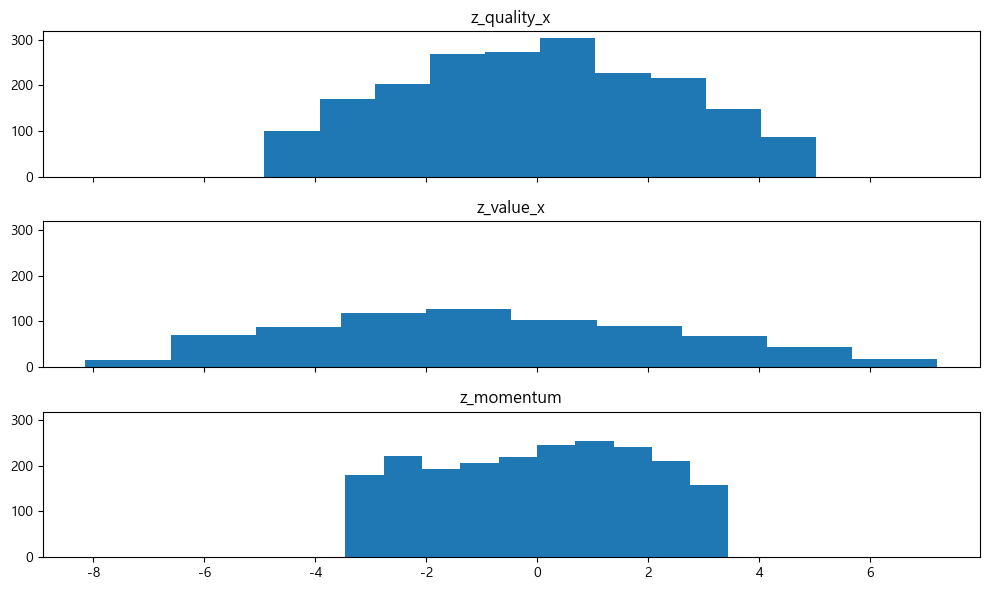

In [69]:
data_z = data_bind[['z_quality_x', 'z_value_x', 'z_momentum']].copy()

plt.rc('axes', unicode_minus=False)
fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True, sharey=True)
for n, ax in enumerate(axes.flatten()):
    ax.hist(data_z.iloc[:, n])
    ax.set_title(data_z.columns[n], size=12)
fig.tight_layout()
plt.show()

각각 퀄리티 지표는 3개, 밸류 지표는 5개, 모멘텀 지표는 2개 기준을 이용해 계산했다. 그림에서 알 수 있듯이 기준을 많이 사용할 수록 Z-Score가 넓게 퍼져있는 모습을 보이며, 각 팩터별 분포가 동일하지 않다. 따라서 다시 Z-Score를 계산해 분포의 넓이를 비슷하게 맞춰주도록 한다.

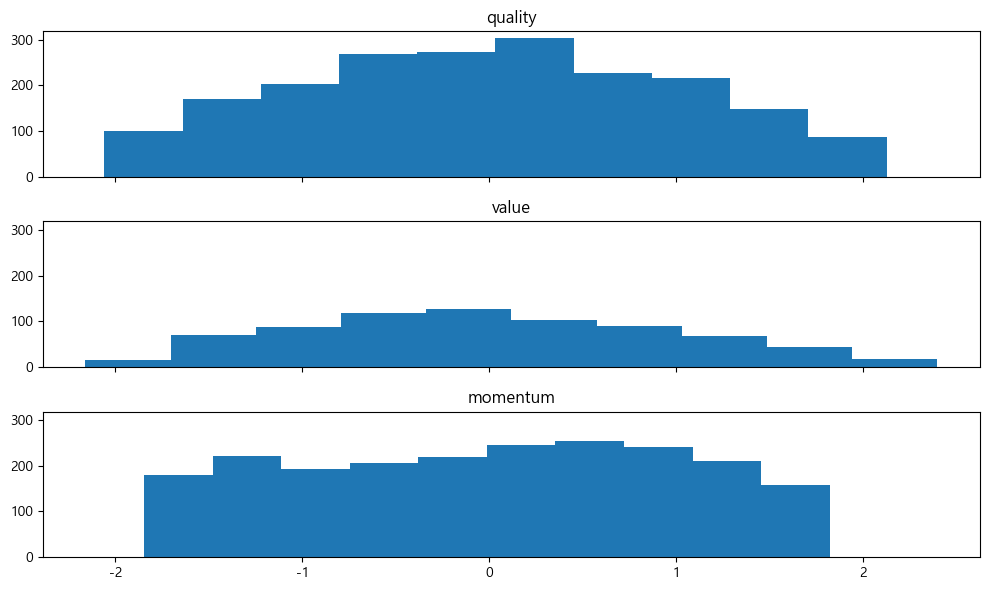

In [71]:
data_bind_final = data_bind[['종목코드', 'z_quality_x', 'z_value_x', 'z_momentum'
                             ]].set_index('종목코드').apply(zscore,
                                                        nan_policy='omit')
data_bind_final.columns = ['quality', 'value', 'momentum']

plt.rc('axes', unicode_minus=False)
fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True, sharey=True)
for n, ax in enumerate(axes.flatten()):
    ax.hist(data_bind_final.iloc[:, n])
    ax.set_title(data_bind_final.columns[n], size=12)
fig.tight_layout()
plt.show()

1. 종목코드와 각 팩터의 Z-Score만 선택한 후, 종목코드를 인덱스로 설정한다.
2. `apply()` 함수를 통해 팩터별로 다시 한번 Z-Score를 계산한다.
3. 열 이름을 설정한다.

재계산된 Z-Score의 분포의 넓이를 살펴보면 이전에 비해 훨씬 비슷해진 것을 알 수 있다. 각 팩터들 간의 상관관계를 살펴보자.

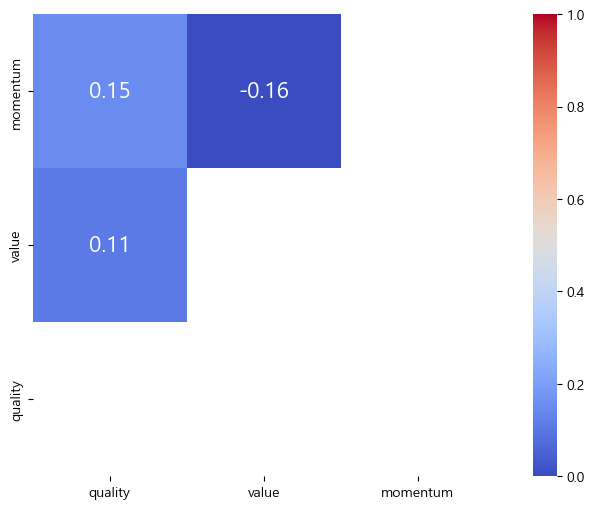

In [72]:
import seaborn as sns

mask = np.triu(data_bind_final.corr())
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(data_bind_final.corr(),
            annot=True,
            mask=mask,
            annot_kws={"size": 16},
            vmin=0,
            vmax=1,
            center=0.5,
            cmap='coolwarm',
            square=True)
ax.invert_yaxis()
plt.show()

각 팩터간 상관관계가 매우 낮으며, 여러 팩터를 동시에 고려함으로서 분산효과를 기대할 수 있다. 이제 계산된 팩터들을 토대로 최종 포트폴리오를 구성해보자.

In [1]:
wts = [0.3, 0.3, 0.3]
data_bind_final_sum = (data_bind_final * wts).sum(axis=1,
                                                  skipna=False).to_frame()
data_bind_final_sum.columns = ['qvm']
port_qvm = data_bind.merge(data_bind_final_sum, on='종목코드')
port_qvm['invest'] = np.where(port_qvm['qvm'].rank() <= 20, 'Y', 'N')

port_qvm[port_qvm['invest'] == 'Y'].round(4)

NameError: name 'data_bind_final' is not defined

1. 각 팩터별 비중을 리스트로 만들며, 0.3으로 동일한 비중을 입력한다. 비중을 [0.2, 0.4, 0.4]와 같이 팩터별로 다르게 줄 수도 있으며, 이는 어떠한 팩터를 더욱 중요하게 생각하는지 혹은 더욱 좋게 보는지에 따라 조정이 가능하다.
2. 팩터별 Z-Score와 비중의 곱을 구한 후 이를 합하며, 데이터프레임(data_bind_final_sum) 형태로 변경한다.
3. 기존 테이블(data_bind)과 합친다.
4. 최종 Z-Score의 합(qvm) 기준 순위가 1~20인 경우는 투자 종목에 해당하므로 'Y', 그렇지 않으면 'N'으로 표시한다.

최종 선택된 종목들을 보면 전반적으로 퀄리티가 높고, 밸류에이션이 낮으며, 최근 수익률이 높다. 물론 특정 팩터(예: 모멘텀)가 좋지 않아도 다른 팩터(예: 밸류)가 지나치게 좋아 선택되는 경우도 있다. 이제 선택된 종목들과 그렇지 않은 종목들간의 특성을 그림으로 표현해보겠다.

In [74]:
import seaborn as sns

def plot_rank(df):

    ax = sns.relplot(data=df,
                     x='rank',
                     y=1,
                     col='variable',
                     hue='invest',
                     style='invest',
                     palette=['grey', 'red'],
                     size='invest',
                     sizes=(100, 10),
                     kind="scatter",
                     col_wrap=5)
    ax.set(xlabel=None)
    ax.set(ylabel=None)

    sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -.1), ncol=2)

    plt.show()

위 함수는 산점도를 표현하며 $x$축은 종목들의 순위, $y$축은 1, 색깔은 투자 여부인 invest에 따라 다르게 나타낸다. 해당 함수를 적용하기 위해 데이터프레임의 형태를 가공하도록 한다.

In [75]:
data_melt = port_qvm.melt(id_vars='invest',
                          value_vars=[
                              'ROE', 'GPA', 'CFO', 'PER', 'PBR', 'PCR', 'PSR',
                              'DY', '12M', 'K_ratio'
                          ])

data_melt.head()

,invest,variable,value
0,N,ROE,0.014633
1,N,ROE,-0.072504
2,N,ROE,0.001441
3,N,ROE,0.010635
4,N,ROE,0.019307


data_bind에서 최종 선택 여부와 팩터별 값을 `melt()` 함수를 통해 세로로 긴 형태로 변경한다. 먼저 퀄리티 지표의 차이를 그림으로 살펴보자.

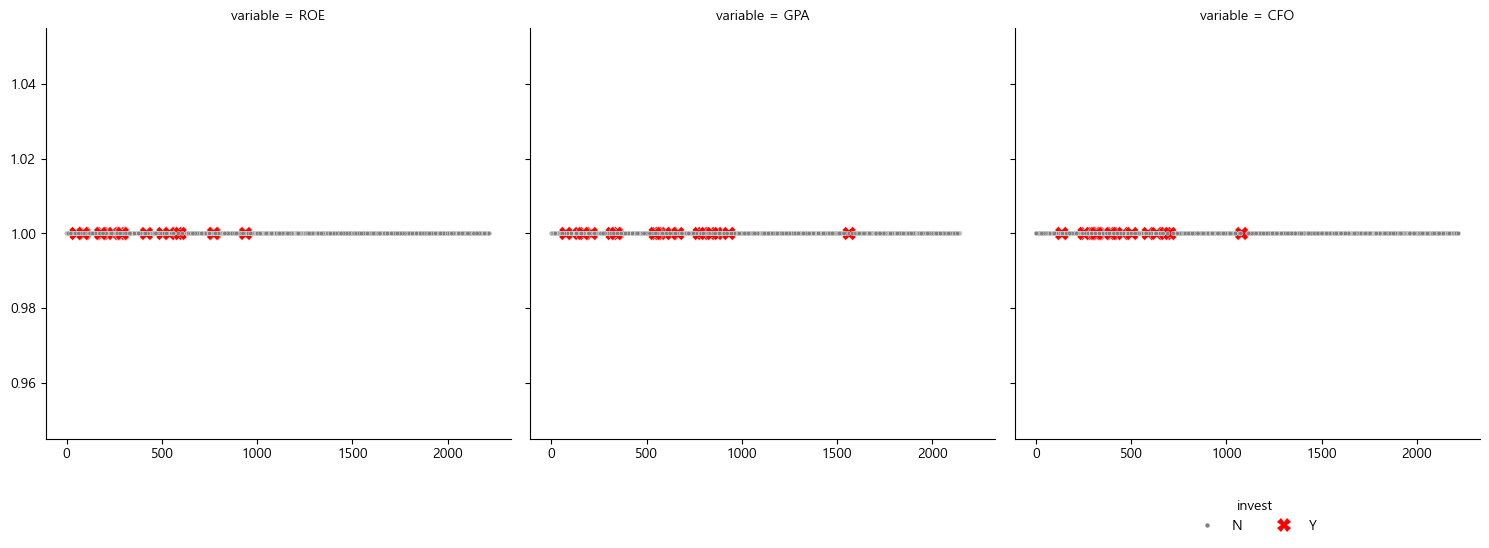

In [76]:
hist_quality = data_melt[data_melt['variable'].isin(['ROE', 'GPA',
                                                     'CFO'])].copy()
hist_quality['rank'] = hist_quality.groupby('variable')['value'].rank(
    ascending=False)
plot_rank(hist_quality)

1. 퀄리티 지표가 포함된 데이터를 선택한다.
2. 각 지표(variable)별 그룹을 묶은 후 순위를 계산한다.
3. `plot_rank()` 함수를 통해 그림으로 나타낸다.

붉은색 X 마크는 투자하는 종목, 회색 O 마크는 투자하지 않는 종목에 해당한다. 전반적으로 멀티팩터 기준으로 선정된 종목들의 퀄리티 순위가 높음을 알 수 있다. 

이번에는 동일한 방법으로 밸류 지표의 차이를 살펴보자.

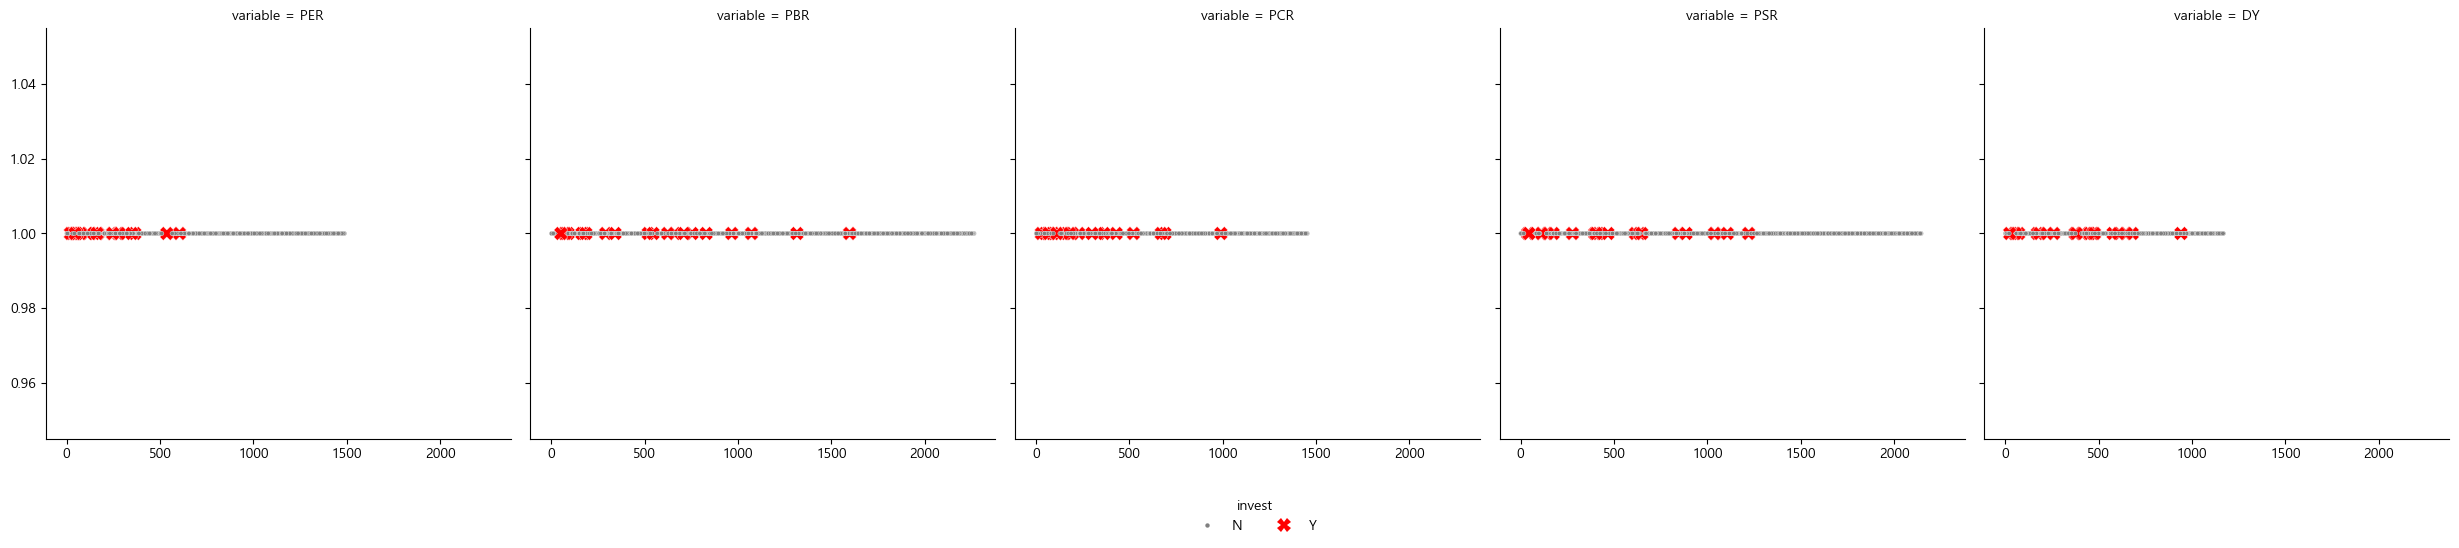

In [77]:
hist_value = data_melt[data_melt['variable'].isin(
    ['PER', 'PBR', 'PCR', 'PSR', 'DY'])].copy()
hist_value['value'] = np.where(hist_value['variable'] == 'DY',
                               1 / hist_value['value'], hist_value['value'])
hist_value['rank'] = hist_value.groupby('variable')['value'].rank()
plot_rank(hist_value)

 밸류 지표 역시 멀티팩터 기준으로 선정된 종목들의 순위가 높다. 그러나 사용되는 지표가 많은 만큼 일부 지표에서는 순위가 낮은 종목들이 선정되기도 한다. 
 
 이번에는 모멘텀 지표의 차이를 살펴보자.

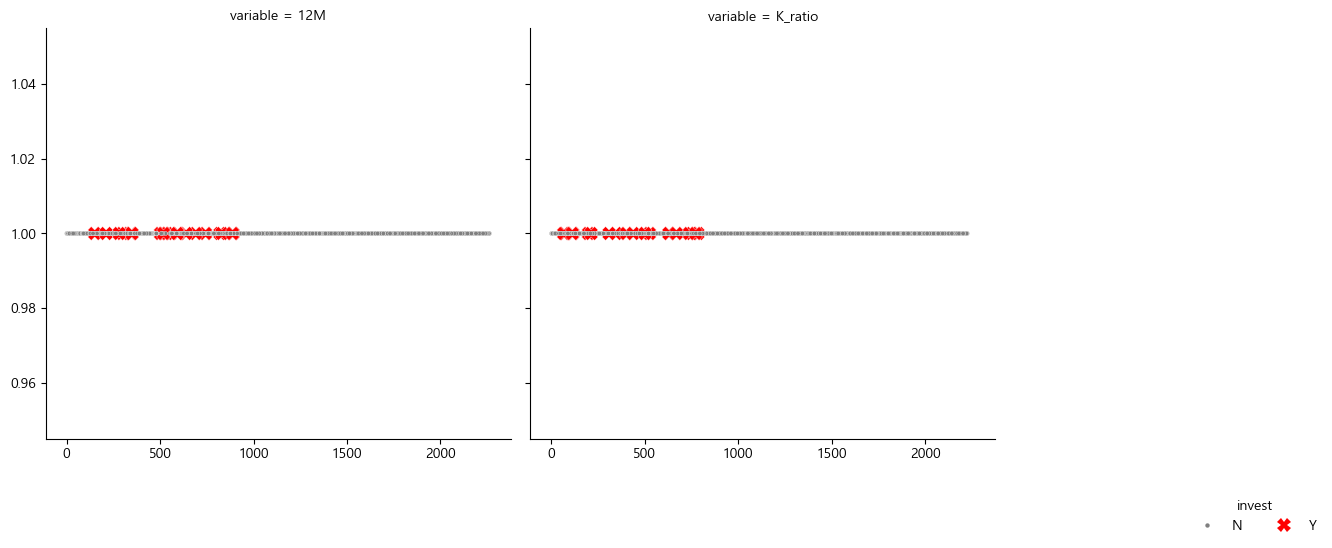

In [78]:
hist_momentum = data_melt[data_melt['variable'].isin(['12M', 'K_ratio'])].copy()
hist_momentum['rank'] = hist_momentum.groupby('variable')['value'].rank(ascending = False)
plot_rank(hist_momentum)

모멘텀 지표 역시 멀티팩터 기준으로 선정된 종목들의 순위가 높다. 

이처럼 멀티팩터 기준으로 종목을 선정할 경우 각 팩터가 골고루 좋은 종목을 선택할 수 있다. 이 외에도 팩터를 만들 수 있는 기본 데이터가 모두 있으므로 최근 적자기업 제외, 매출 증가 등 다양한 전략을 추가할 수도 있다.

In [79]:
port_qvm[port_qvm['invest'] == 'Y']['종목코드'].to_excel('model.xlsx', index=False)

마지막으로 모델 포트폴리오에 해당하는 종목들의 종목코드를 엑셀 파일로 저장한다.